# Import data

In [7]:
Save_path = "/content/drive/MyDrive/EECS6444/Project/RQ1"

In [8]:
pip install transformers torch

Note: you may need to restart the kernel to use updated packages.


In [9]:
!pip install nltk

In [10]:
!pip install nltk gensim scikit-learn

In [11]:
from datasets import load_dataset
import pandas as pd
import requests
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline
from tqdm import tqdm
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

ModuleNotFoundError: No module named 'seaborn'

# Load SWE-Bench Lite

In [ ]:
# Load the dataset
dataset = load_dataset("SWE-bench/SWE-bench_lite")

# Check available splits
print(dataset)

# Convert a specific split (e.g., "test") to a pandas DataFrame
df = dataset["test"].to_pandas()


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


DatasetDict({
    dev: Dataset({
        features: ['repo', 'instance_id', 'base_commit', 'patch', 'test_patch', 'problem_statement', 'hints_text', 'created_at', 'version', 'FAIL_TO_PASS', 'PASS_TO_PASS', 'environment_setup_commit'],
        num_rows: 23
    })
    test: Dataset({
        features: ['repo', 'instance_id', 'base_commit', 'patch', 'test_patch', 'problem_statement', 'hints_text', 'created_at', 'version', 'FAIL_TO_PASS', 'PASS_TO_PASS', 'environment_setup_commit'],
        num_rows: 300
    })
})


In [ ]:
df.head()

repo             instance_id  \
0  astropy/astropy  astropy__astropy-12907   
1  astropy/astropy  astropy__astropy-14182   
2  astropy/astropy  astropy__astropy-14365   
3  astropy/astropy  astropy__astropy-14995   
4  astropy/astropy   astropy__astropy-6938   

                                base_commit  \
0  d16bfe05a744909de4b27f5875fe0d4ed41ce607   
1  a5917978be39d13cd90b517e1de4e7a539ffaa48   
2  7269fa3e33e8d02485a647da91a5a2a60a06af61   
3  b16c7d12ccbc7b2d20364b89fb44285bcbfede54   
4  c76af9ed6bb89bfba45b9f5bc1e635188278e2fa   

                                               patch  \
0  diff --git a/astropy/modeling/separable.py b/a...   
1  diff --git a/astropy/io/ascii/rst.py b/astropy...   
2  diff --git a/astropy/io/ascii/qdp.py b/astropy...   
3  diff --git a/astropy/nddata/mixins/ndarithmeti...   
4  diff --git a/astropy/io/fits/fitsrec.py b/astr...   

                                          test_patch  \
0  diff --git a/astropy/modeling/tests/test_separ...   
1  diff --git a/astropy/io/ascii/tests/test_rst.p...   
2  diff --git a/astropy/io/ascii/tests/test_qdp.p...   
3  diff --git a/astropy/nddata/mixins/tests/test_...   
4  diff --git a/astropy/io/fits/tests/test_checks...   

                                   problem_statement  \
0  Modeling's `separability_matrix` does not comp...   
1  Please support header rows in RestructuredText...   
2  ascii.qdp Table format assumes QDP commands ar...   
3  In v5.3, NDDataRef mask propagation fails when...   
4  Possible bug in io.fits related to D exponents...   

                                          hints_text            created_at  \
0                                                     2022-03-03T15:14:54Z   
1                                                     2022-12-16T11:13:37Z   
2  Welcome to Astropy 👋 and thank you for your fi...  2023-02-06T19:20:34Z   
3  Welcome to Astropy 👋 and thank you for your fi...  2023-06-27T19:48:18Z   
4  It is tested with `astropy/io/fits/tests/test_...  2017-12-07T00:01:14Z   

  version                                       FAIL_TO_PASS  \
0     4.3  ["astropy/modeling/tests/test_separable.py::te...   
1     5.1  ["astropy/io/ascii/tests/test_rst.py::test_rst...   
2     5.1  ["astropy/io/ascii/tests/test_qdp.py::test_rou...   
3     5.2  ["astropy/nddata/mixins/tests/test_ndarithmeti...   
4     1.3  ["astropy/io/fits/tests/test_checksum.py::Test...   

                                        PASS_TO_PASS  \
0  ["astropy/modeling/tests/test_separable.py::te...   
1  ["astropy/io/ascii/tests/test_rst.py::test_rea...   
2  ["astropy/io/ascii/tests/test_qdp.py::test_get...   
3  ["astropy/nddata/mixins/tests/test_ndarithmeti...   
4  ["astropy/io/fits/tests/test_checksum.py::Test...   

                   environment_setup_commit  
0  298ccb478e6bf092953bca67a3d29dc6c35f6752  
1  5f74eacbcc7fff707a44d8eb58adaa514cb7dcb5  
2  5f74eacbcc7fff707a44d8eb58adaa514cb7dcb5  
3  362f6df12abf9bd769d4915fabf955c993ea22cf  
4  848c8fa21332abd66b44efe3cb48b72377fb32cc

In [ ]:
len(df)

300

In [ ]:
df.to_csv(os.path.join(Save_path, "df_v0.csv"), index=False)

# EDA: Metadata

## base_commit

In [ ]:
print(df['base_commit'].nunique())
df[df.duplicated(subset=['base_commit'], keep=False)]


297


repo         instance_id  \
244  sympy/sympy  sympy__sympy-14308   
245  sympy/sympy  sympy__sympy-14317   
251  sympy/sympy  sympy__sympy-15345   
252  sympy/sympy  sympy__sympy-15346   
285  sympy/sympy  sympy__sympy-21612   
286  sympy/sympy  sympy__sympy-21614   

                                  base_commit  \
244  fb536869fb7aa28b2695ad7a3b70949926b291c4   
245  fb536869fb7aa28b2695ad7a3b70949926b291c4   
251  9ef28fba5b4d6d0168237c9c005a550e6dc27d81   
252  9ef28fba5b4d6d0168237c9c005a550e6dc27d81   
285  b4777fdcef467b7132c055f8ac2c9a5059e6a145   
286  b4777fdcef467b7132c055f8ac2c9a5059e6a145   

                                                 patch  \
244  diff --git a/sympy/printing/pretty/pretty.py b...   
245  diff --git a/sympy/printing/latex.py b/sympy/p...   
251  diff --git a/sympy/printing/mathematica.py b/s...   
252  diff --git a/sympy/simplify/trigsimp.py b/symp...   
285  diff --git a/sympy/printing/str.py b/sympy/pri...   
286  diff --git a/sympy/core/function.py b/sympy/co...   

                                            test_patch  \
244  diff --git a/sympy/printing/pretty/tests/test_...   
245  diff --git a/sympy/printing/tests/test_latex.p...   
251  diff --git a/sympy/printing/tests/test_mathema...   
252  diff --git a/sympy/simplify/tests/test_trigsim...   
285  diff --git a/sympy/printing/tests/test_str.py ...   
286  diff --git a/sympy/core/tests/test_kind.py b/s...   

                                     problem_statement  \
244  vectors break pretty printing\n```py\r\nIn [1]...   
245  LaTeX printer does not use the same order of m...   
251  mathematica_code gives wrong output with Max\n...   
252  can't simplify sin/cos with Rational?\nlatest ...   
285  Latex parsing of fractions yields wrong expres...   
286  Wrong Derivative kind attribute\nI'm playing a...   

                                            hints_text            created_at  \
244  Hi @asmeurer . I would like to work on this is...  2018-02-22T16:54:06Z   
245                                                     2018-02-24T10:05:10Z   
251  Hi, I'm new (to the project and development in...  2018-10-05T06:00:31Z   
252  some can be simplified\r\n```python\r\nfrom sy...  2018-10-05T17:25:21Z   
285  This can be further simplified and fails with ...  2021-06-14T04:31:24Z   
286  As I dig deeper into this issue, the problem i...  2021-06-14T07:56:59Z   

    version                                       FAIL_TO_PASS  \
244     1.1  ["test_issue_12675", "test_pretty_print_unicode"]   
245     1.1       ["test_latex_Poly", "test_latex_Poly_order"]   
251     1.4                                  ["test_Function"]   
252     1.4              ["test_issue_15129_trigsimp_methods"]   
285     1.9                                       ["test_Mul"]   
286     1.9                           ["test_Derivative_kind"]   

                                          PASS_TO_PASS  \
244  ["test_pretty_ascii_str", "test_pretty_unicode...   
245  ["test_printmethod", "test_latex_basic", "test...   
251  ["test_Integer", "test_Rational", "test_Pow", ...   
252  ["test_trigsimp1", "test_trigsimp1a", "test_tr...   
285  ["test_printmethod", "test_Abs", "test_Add", "...   
286  ["test_NumberKind", "test_Add_kind", "test_mul...   

                     environment_setup_commit  
244  ec9e3c0436fbff934fa84e22bf07f1b3ef5bfac3  
245  ec9e3c0436fbff934fa84e22bf07f1b3ef5bfac3  
251  73b3f90093754c5ed1561bd885242330e3583004  
252  73b3f90093754c5ed1561bd885242330e3583004  
285  f9a6f50ec0c74d935c50a6e9c9b2cb0469570d91  
286  f9a6f50ec0c74d935c50a6e9c9b2cb0469570d91

## created_at

In [ ]:
print(df['created_at'].nunique())
df[df.duplicated(subset=['created_at'], keep=False)]


300


Empty DataFrame
Columns: [repo, instance_id, base_commit, patch, test_patch, problem_statement, hints_text, created_at, version, FAIL_TO_PASS, PASS_TO_PASS, environment_setup_commit]
Index: []

## environment_setup_commit

In [ ]:
print(df['environment_setup_commit'].nunique())
df[df.duplicated(subset=['environment_setup_commit'], keep=False)]


64


repo             instance_id  \
1    astropy/astropy  astropy__astropy-14182   
2    astropy/astropy  astropy__astropy-14365   
4    astropy/astropy   astropy__astropy-6938   
5    astropy/astropy   astropy__astropy-7746   
6      django/django    django__django-10914   
..               ...                     ...   
294      sympy/sympy      sympy__sympy-23262   
295      sympy/sympy      sympy__sympy-24066   
296      sympy/sympy      sympy__sympy-24102   
297      sympy/sympy      sympy__sympy-24152   
298      sympy/sympy      sympy__sympy-24213   

                                  base_commit  \
1    a5917978be39d13cd90b517e1de4e7a539ffaa48   
2    7269fa3e33e8d02485a647da91a5a2a60a06af61   
4    c76af9ed6bb89bfba45b9f5bc1e635188278e2fa   
5    d5bd3f68bb6d5ce3a61bdce9883ee750d1afade5   
6    e7fd69d051eaa67cb17f172a39b57253e9cb831a   
..                                        ...   
294  fdc707f73a65a429935c01532cd3970d3355eab6   
295  514579c655bf22e2af14f0743376ae1d7befe345   
296  58598660a3f6ab3d918781c4988c2e4b2bdd9297   
297  b9af885473ad7e34b5b0826cb424dd26d8934670   
298  e8c22f6eac7314be8d92590bfff92ced79ee03e2   

                                                 patch  \
1    diff --git a/astropy/io/ascii/rst.py b/astropy...   
2    diff --git a/astropy/io/ascii/qdp.py b/astropy...   
4    diff --git a/astropy/io/fits/fitsrec.py b/astr...   
5    diff --git a/astropy/wcs/wcs.py b/astropy/wcs/...   
6    diff --git a/django/conf/global_settings.py b/...   
..                                                 ...   
294  diff --git a/sympy/utilities/lambdify.py b/sym...   
295  diff --git a/sympy/physics/units/unitsystem.py...   
296  diff --git a/sympy/parsing/mathematica.py b/sy...   
297  diff --git a/sympy/physics/quantum/tensorprodu...   
298  diff --git a/sympy/physics/units/unitsystem.py...   

                                            test_patch  \
1    diff --git a/astropy/io/ascii/tests/test_rst.p...   
2    diff --git a/astropy/io/ascii/tests/test_qdp.p...   
4    diff --git a/astropy/io/fits/tests/test_checks...   
5    diff --git a/astropy/wcs/tests/test_wcs.py b/a...   
6    diff --git a/tests/test_utils/tests.py b/tests...   
..                                                 ...   
294  diff --git a/sympy/utilities/tests/test_lambdi...   
295  diff --git a/sympy/physics/units/tests/test_qu...   
296  diff --git a/sympy/parsing/tests/test_mathemat...   
297  diff --git a/sympy/physics/quantum/tests/test_...   
298  diff --git a/sympy/physics/units/tests/test_qu...   

                                     problem_statement  \
1    Please support header rows in RestructuredText...   
2    ascii.qdp Table format assumes QDP commands ar...   
4    Possible bug in io.fits related to D exponents...   
5    Issue when passing empty lists/arrays to WCS t...   
6    Set default FILE_UPLOAD_PERMISSION to 0o644.\n...   
..                                                 ...   
294  Python code printer not respecting tuple with ...   
295  SI._collect_factor_and_dimension() cannot prop...   
296  Cannot parse Greek characters (and possibly ot...   
297  Bug in expand of TensorProduct + Workaround + ...   
298  collect_factor_and_dimension does not detect e...   

                                            hints_text            created_at  \
1                                                       2022-12-16T11:13:37Z   
2    Welcome to Astropy 👋 and thank you for your fi...  2023-02-06T19:20:34Z   
4    It is tested with `astropy/io/fits/tests/test_...  2017-12-07T00:01:14Z   
5                                                       2018-08-20T14:07:20Z   
6    I think you're talking about ef70af77ec53160d5...  2019-01-30T13:13:20Z   
..                                                 ...                   ...   
294  Bisected to 6ccd2b07ded5074941bb80b5967d60fa15...  2022-03-21T07:17:35Z   
295                                                     2022-09-16T22:58:15Z   
296                                    

## remove cols: base_commit

In [ ]:
cols_to_remove = ['base_commit', 'created_at', 'environment_setup_commit']
df = df.drop(columns=cols_to_remove)
df.head()

repo             instance_id  \
0  astropy/astropy  astropy__astropy-12907   
1  astropy/astropy  astropy__astropy-14182   
2  astropy/astropy  astropy__astropy-14365   
3  astropy/astropy  astropy__astropy-14995   
4  astropy/astropy   astropy__astropy-6938   

                                               patch  \
0  diff --git a/astropy/modeling/separable.py b/a...   
1  diff --git a/astropy/io/ascii/rst.py b/astropy...   
2  diff --git a/astropy/io/ascii/qdp.py b/astropy...   
3  diff --git a/astropy/nddata/mixins/ndarithmeti...   
4  diff --git a/astropy/io/fits/fitsrec.py b/astr...   

                                          test_patch  \
0  diff --git a/astropy/modeling/tests/test_separ...   
1  diff --git a/astropy/io/ascii/tests/test_rst.p...   
2  diff --git a/astropy/io/ascii/tests/test_qdp.p...   
3  diff --git a/astropy/nddata/mixins/tests/test_...   
4  diff --git a/astropy/io/fits/tests/test_checks...   

                                   problem_statement  \
0  Modeling's `separability_matrix` does not comp...   
1  Please support header rows in RestructuredText...   
2  ascii.qdp Table format assumes QDP commands ar...   
3  In v5.3, NDDataRef mask propagation fails when...   
4  Possible bug in io.fits related to D exponents...   

                                          hints_text version  \
0                                                        4.3   
1                                                        5.1   
2  Welcome to Astropy 👋 and thank you for your fi...     5.1   
3  Welcome to Astropy 👋 and thank you for your fi...     5.2   
4  It is tested with `astropy/io/fits/tests/test_...     1.3   

                                        FAIL_TO_PASS  \
0  ["astropy/modeling/tests/test_separable.py::te...   
1  ["astropy/io/ascii/tests/test_rst.py::test_rst...   
2  ["astropy/io/ascii/tests/test_qdp.py::test_rou...   
3  ["astropy/nddata/mixins/tests/test_ndarithmeti...   
4  ["astropy/io/fits/tests/test_checksum.py::Test...   

                                        PASS_TO_PASS  
0  ["astropy/modeling/tests/test_separable.py::te...  
1  ["astropy/io/ascii/tests/test_rst.py::test_rea...  
2  ["astropy/io/ascii/tests/test_qdp.py::test_get...  
3  ["astropy/nddata/mixins/tests/test_ndarithmeti...  
4  ["astropy/io/fits/tests/test_checksum.py::Test...

## Patch

In [ ]:
print(df['patch'].nunique())
df[df.duplicated(subset=['patch'], keep=False)]


300


Empty DataFrame
Columns: [repo, instance_id, patch, test_patch, problem_statement, hints_text, version, FAIL_TO_PASS, PASS_TO_PASS]
Index: []

In [ ]:
df["patch"][0]

"diff --git a/astropy/modeling/separable.py b/astropy/modeling/separable.py\n--- a/astropy/modeling/separable.py\n+++ b/astropy/modeling/separable.py\n@@ -242,7 +242,7 @@ def _cstack(left, right):\n         cright = _coord_matrix(right, 'right', noutp)\n     else:\n         cright = np.zeros((noutp, right.shape[1]))\n-        cright[-right.shape[0]:, -right.shape[1]:] = 1\n+        cright[-right.shape[0]:, -right.shape[1]:] = right\n \n     return np.hstack([cleft, cright])\n \n"

In [ ]:
import re

def get_patch_stats(patch_text):
    if not isinstance(patch_text, str):
        return {
            "n_files_touched": 0,
            "added_lines": 0,
            "removed_lines": 0,
            "patch_size": 0
        }

    # --- Files touched ---
    files = re.findall(r"diff --git a/(.*?) b/", patch_text)
    n_files = len(set(files))

    # --- Line-level changes ---
    added = sum(1 for l in patch_text.split("\n")
                if l.startswith("+") and not l.startswith("+++"))
    removed = sum(1 for l in patch_text.split("\n")
                  if l.startswith("-") and not l.startswith("---"))

    return {
        "n_files_touched": n_files,
        "added_lines": added,
        "removed_lines": removed,
        "patch_size": added + removed
    }


In [ ]:
patch_features = df["patch"].apply(get_patch_stats).apply(pd.Series)
df = pd.concat([df, patch_features], axis=1)
print(len(df))
df.head()


300


repo             instance_id  \
0  astropy/astropy  astropy__astropy-12907   
1  astropy/astropy  astropy__astropy-14182   
2  astropy/astropy  astropy__astropy-14365   
3  astropy/astropy  astropy__astropy-14995   
4  astropy/astropy   astropy__astropy-6938   

                                               patch  \
0  diff --git a/astropy/modeling/separable.py b/a...   
1  diff --git a/astropy/io/ascii/rst.py b/astropy...   
2  diff --git a/astropy/io/ascii/qdp.py b/astropy...   
3  diff --git a/astropy/nddata/mixins/ndarithmeti...   
4  diff --git a/astropy/io/fits/fitsrec.py b/astr...   

                                          test_patch  \
0  diff --git a/astropy/modeling/tests/test_separ...   
1  diff --git a/astropy/io/ascii/tests/test_rst.p...   
2  diff --git a/astropy/io/ascii/tests/test_qdp.p...   
3  diff --git a/astropy/nddata/mixins/tests/test_...   
4  diff --git a/astropy/io/fits/tests/test_checks...   

                                   problem_statement  \
0  Modeling's `separability_matrix` does not comp...   
1  Please support header rows in RestructuredText...   
2  ascii.qdp Table format assumes QDP commands ar...   
3  In v5.3, NDDataRef mask propagation fails when...   
4  Possible bug in io.fits related to D exponents...   

                                          hints_text version  \
0                                                        4.3   
1                                                        5.1   
2  Welcome to Astropy 👋 and thank you for your fi...     5.1   
3  Welcome to Astropy 👋 and thank you for your fi...     5.2   
4  It is tested with `astropy/io/fits/tests/test_...     1.3   

                                        FAIL_TO_PASS  \
0  ["astropy/modeling/tests/test_separable.py::te...   
1  ["astropy/io/ascii/tests/test_rst.py::test_rst...   
2  ["astropy/io/ascii/tests/test_qdp.py::test_rou...   
3  ["astropy/nddata/mixins/tests/test_ndarithmeti...   
4  ["astropy/io/fits/tests/test_checksum.py::Test...   

                                        PASS_TO_PASS  n_files_touched  \
0  ["astropy/modeling/tests/test_separable.py::te...                1   
1  ["astropy/io/ascii/tests/test_rst.py::test_rea...                1   
2  ["astropy/io/ascii/tests/test_qdp.py::test_get...                1   
3  ["astropy/nddata/mixins/tests/test_ndarithmeti...                1   
4  ["astropy/io/fits/tests/test_checksum.py::Test...                1   

   added_lines  removed_lines  patch_size  
0            1              1           2  
1           31             10          41  
2            2              2           4  
3            2              2           4  
4            1              1           2

In [ ]:
print(df['n_files_touched'].nunique())

1


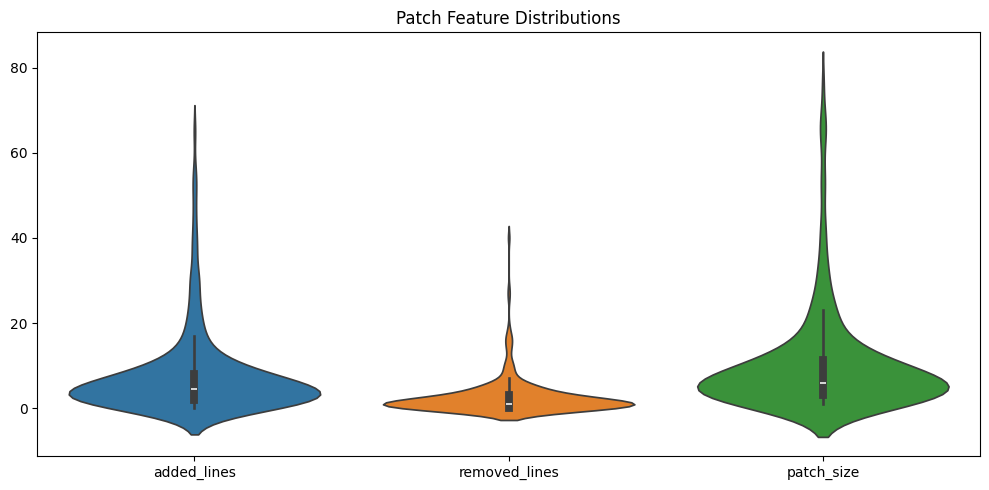

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(
    data=df[["added_lines", "removed_lines", "patch_size"]],
)
plt.title("Patch Feature Distributions")
plt.tight_layout()
plt.savefig(os.path.join(Save_path, "patch_feature_distributions.pdf"))
plt.show()


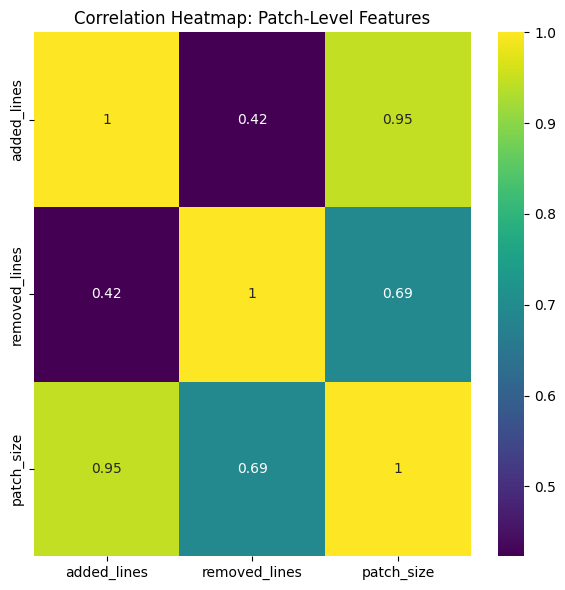

In [ ]:
import seaborn as sns

corr = df[[ "added_lines", "removed_lines", "patch_size"]].corr()

plt.figure(figsize=(6,6))
sns.heatmap(corr, annot=True, cmap="viridis")
plt.title("Correlation Heatmap: Patch-Level Features")
plt.tight_layout()
plt.savefig(os.path.join(Save_path, "correlation_heatmap_patch_features.pdf"))
plt.show()


In [ ]:
df[['added_lines', 'removed_lines', 'patch_size']].describe()

added_lines  removed_lines  patch_size
count   300.000000     300.000000   300.00000
mean      7.510000       2.620000    10.13000
std       9.616904       4.329521    12.10212
min       0.000000       0.000000     1.00000
25%       2.000000       0.000000     3.00000
50%       4.500000       1.000000     6.00000
75%       8.000000       3.000000    11.25000
max      65.000000      40.000000    76.00000

/tmp/ipython-input-4992258.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="repo", y="patch_size", data=df, palette="Set2")


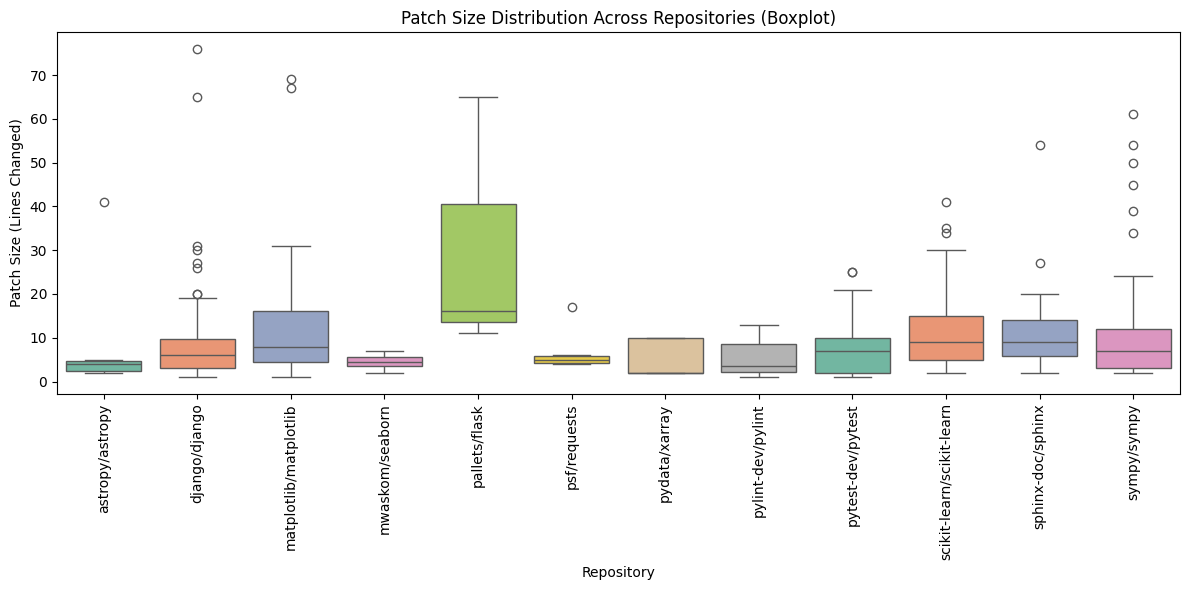

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="repo", y="patch_size", data=df, palette="Set2")
# plt.xticks(rotation=45)
plt.title("Patch Size Distribution Across Repositories (Boxplot)")
plt.xlabel("Repository")
plt.ylabel("Patch Size (Lines Changed)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(os.path.join(Save_path, "patch_total_distribution_across_repos.pdf"))
plt.show()



In [ ]:
df.to_csv(os.path.join(Save_path, "df_v1.csv"), index=False)

## test_patch

In [ ]:
df = pd.read_csv(os.path.join(Save_path, "df_v1.csv"))
# cols_to_remove = ['n_files_touched', 'added_lines', 'removed_lines']
# df = df.drop(columns=cols_to_remove)
df.head()

repo             instance_id  \
0  astropy/astropy  astropy__astropy-12907   
1  astropy/astropy  astropy__astropy-14182   
2  astropy/astropy  astropy__astropy-14365   
3  astropy/astropy  astropy__astropy-14995   
4  astropy/astropy   astropy__astropy-6938   

                                               patch  \
0  diff --git a/astropy/modeling/separable.py b/a...   
1  diff --git a/astropy/io/ascii/rst.py b/astropy...   
2  diff --git a/astropy/io/ascii/qdp.py b/astropy...   
3  diff --git a/astropy/nddata/mixins/ndarithmeti...   
4  diff --git a/astropy/io/fits/fitsrec.py b/astr...   

                                          test_patch  \
0  diff --git a/astropy/modeling/tests/test_separ...   
1  diff --git a/astropy/io/ascii/tests/test_rst.p...   
2  diff --git a/astropy/io/ascii/tests/test_qdp.p...   
3  diff --git a/astropy/nddata/mixins/tests/test_...   
4  diff --git a/astropy/io/fits/tests/test_checks...   

                                   problem_statement  \
0  Modeling's `separability_matrix` does not comp...   
1  Please support header rows in RestructuredText...   
2  ascii.qdp Table format assumes QDP commands ar...   
3  In v5.3, NDDataRef mask propagation fails when...   
4  Possible bug in io.fits related to D exponents...   

                                          hints_text  version  \
0                                                NaN      4.3   
1                                                NaN      5.1   
2  Welcome to Astropy 👋 and thank you for your fi...      5.1   
3  Welcome to Astropy 👋 and thank you for your fi...      5.2   
4  It is tested with `astropy/io/fits/tests/test_...      1.3   

                                        FAIL_TO_PASS  \
0  ["astropy/modeling/tests/test_separable.py::te...   
1  ["astropy/io/ascii/tests/test_rst.py::test_rst...   
2  ["astropy/io/ascii/tests/test_qdp.py::test_rou...   
3  ["astropy/nddata/mixins/tests/test_ndarithmeti...   
4  ["astropy/io/fits/tests/test_checksum.py::Test...   

                                        PASS_TO_PASS  n_files_touched  \
0  ["astropy/modeling/tests/test_separable.py::te...                1   
1  ["astropy/io/ascii/tests/test_rst.py::test_rea...                1   
2  ["astropy/io/ascii/tests/test_qdp.py::test_get...                1   
3  ["astropy/nddata/mixins/tests/test_ndarithmeti...                1   
4  ["astropy/io/fits/tests/test_checksum.py::Test...                1   

   added_lines  removed_lines  patch_size  
0            1              1           2  
1           31             10          41  
2            2              2           4  
3            2              2           4  
4            1              1           2

In [ ]:
df["test_patch"][0]

"diff --git a/astropy/modeling/tests/test_separable.py b/astropy/modeling/tests/test_separable.py\n--- a/astropy/modeling/tests/test_separable.py\n+++ b/astropy/modeling/tests/test_separable.py\n@@ -28,6 +28,13 @@\n p1 = models.Polynomial1D(1, name='p1')\n \n \n+cm_4d_expected = (np.array([False, False, True, True]),\n+                  np.array([[True,  True,  False, False],\n+                            [True,  True,  False, False],\n+                            [False, False, True,  False],\n+                            [False, False, False, True]]))\n+\n+\n compound_models = {\n     'cm1': (map3 & sh1 | rot & sh1 | sh1 & sh2 & sh1,\n             (np.array([False, False, True]),\n@@ -52,7 +59,17 @@\n     'cm7': (map2 | p2 & sh1,\n             (np.array([False, True]),\n              np.array([[True, False], [False, True]]))\n-            )\n+            ),\n+    'cm8': (rot & (sh1 & sh2), cm_4d_expected),\n+    'cm9': (rot & sh1 & sh2, cm_4d_expected),\n+    'cm10': ((rot & sh1) & s

In [ ]:
import re

def get_test_patch_stats(patch_text):
    if not isinstance(patch_text, str):
        return {
            "n_test_files_touched": 0,
            "test_added_lines": 0,
            "test_removed_lines": 0,
            "test_patch_size": 0
        }

    # --- Files touched ---
    files = re.findall(r"diff --git a/(.*?) b/", patch_text)
    n_files = len(set(files))

    # --- Line-level changes ---
    added = sum(1 for l in patch_text.split("\n")
                if l.startswith("+") and not l.startswith("+++"))
    removed = sum(1 for l in patch_text.split("\n")
                  if l.startswith("-") and not l.startswith("---"))

    return {
        "n_test_files_touched": n_files,
        "test_added_lines": added,
        "test_removed_lines": removed,
        "test_patch_size": added + removed
    }


In [ ]:
patch_features = df["test_patch"].apply(get_test_patch_stats).apply(pd.Series)
df = pd.concat([df, patch_features], axis=1)
print(len(df))
df.head()


300


repo             instance_id  \
0  astropy/astropy  astropy__astropy-12907   
1  astropy/astropy  astropy__astropy-14182   
2  astropy/astropy  astropy__astropy-14365   
3  astropy/astropy  astropy__astropy-14995   
4  astropy/astropy   astropy__astropy-6938   

                                               patch  \
0  diff --git a/astropy/modeling/separable.py b/a...   
1  diff --git a/astropy/io/ascii/rst.py b/astropy...   
2  diff --git a/astropy/io/ascii/qdp.py b/astropy...   
3  diff --git a/astropy/nddata/mixins/ndarithmeti...   
4  diff --git a/astropy/io/fits/fitsrec.py b/astr...   

                                          test_patch  \
0  diff --git a/astropy/modeling/tests/test_separ...   
1  diff --git a/astropy/io/ascii/tests/test_rst.p...   
2  diff --git a/astropy/io/ascii/tests/test_qdp.p...   
3  diff --git a/astropy/nddata/mixins/tests/test_...   
4  diff --git a/astropy/io/fits/tests/test_checks...   

                                   problem_statement  \
0  Modeling's `separability_matrix` does not comp...   
1  Please support header rows in RestructuredText...   
2  ascii.qdp Table format assumes QDP commands ar...   
3  In v5.3, NDDataRef mask propagation fails when...   
4  Possible bug in io.fits related to D exponents...   

                                          hints_text  version  \
0                                                NaN      4.3   
1                                                NaN      5.1   
2  Welcome to Astropy 👋 and thank you for your fi...      5.1   
3  Welcome to Astropy 👋 and thank you for your fi...      5.2   
4  It is tested with `astropy/io/fits/tests/test_...      1.3   

                                        FAIL_TO_PASS  \
0  ["astropy/modeling/tests/test_separable.py::te...   
1  ["astropy/io/ascii/tests/test_rst.py::test_rst...   
2  ["astropy/io/ascii/tests/test_qdp.py::test_rou...   
3  ["astropy/nddata/mixins/tests/test_ndarithmeti...   
4  ["astropy/io/fits/tests/test_checksum.py::Test...   

                                        PASS_TO_PASS  n_files_touched  \
0  ["astropy/modeling/tests/test_separable.py::te...                1   
1  ["astropy/io/ascii/tests/test_rst.py::test_rea...                1   
2  ["astropy/io/ascii/tests/test_qdp.py::test_get...                1   
3  ["astropy/nddata/mixins/tests/test_ndarithmeti...                1   
4  ["astropy/io/fits/tests/test_checksum.py::Test...                1   

   added_lines  removed_lines  patch_size  n_test_files_touched  \
0            1              1           2                     1   
1           31             10          41                     1   
2            2              2           4                     1   
3            2              2           4                     1   
4            1              1           2                     2   

   test_added_lines  test_removed_lines  test_patch_size  
0                18                   1               19  
1                28                   0               28  
2                14                   1               15  
3                39                   0               39  
4                15                   2               17

In [ ]:
print(df['n_test_files_touched'].nunique())

6


In [ ]:
df[['n_test_files_touched', 'test_added_lines', 'test_removed_lines','test_patch_size']].describe()

n_test_files_touched  test_added_lines  test_removed_lines  \
count            300.000000        300.000000          300.000000   
mean               1.260000         21.140000            2.296667   
std                0.673731         28.365632            7.964931   
min                1.000000          1.000000            0.000000   
25%                1.000000          7.000000            0.000000   
50%                1.000000         13.000000            0.000000   
75%                1.000000         24.000000            1.000000   
max                8.000000        269.000000           79.000000   

       test_patch_size  
count       300.000000  
mean         23.436667  
std          31.722659  
min           1.000000  
25%           7.000000  
50%          14.500000  
75%          27.000000  
max         321.000000

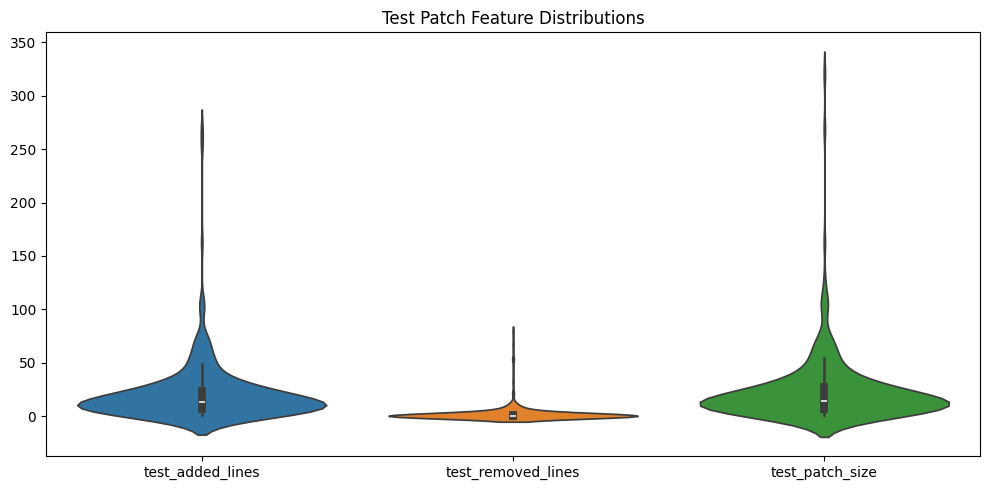

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(
    data=df[["test_added_lines", "test_removed_lines", "test_patch_size"]],
)
plt.title("Test Patch Feature Distributions")
plt.tight_layout()
plt.savefig(os.path.join(Save_path, "test_patch_feature_distributions.pdf"))
plt.show()


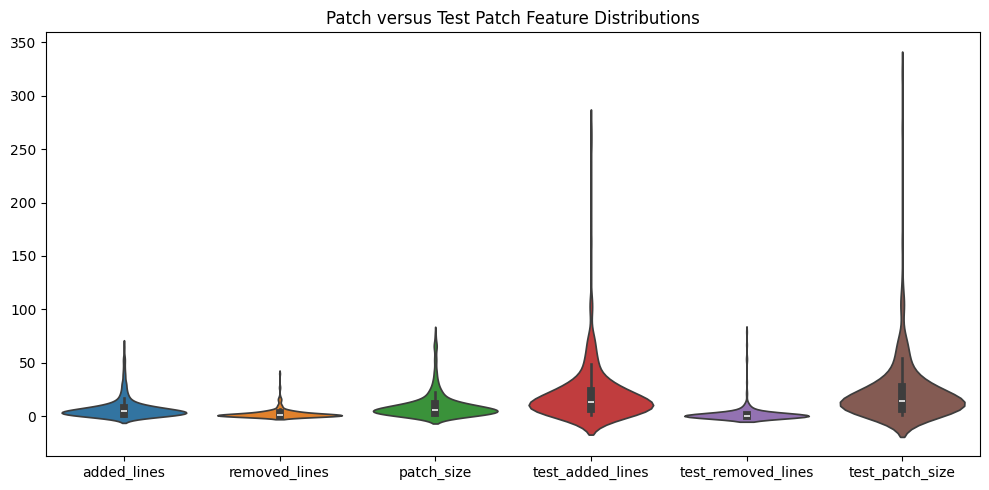

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(
    data=df[["added_lines", "removed_lines", "patch_size","test_added_lines", "test_removed_lines", "test_patch_size"]],
)
plt.title("Patch versus Test Patch Feature Distributions")
plt.tight_layout()
plt.savefig(os.path.join(Save_path, "both_patch_feature_distributions.pdf"))
plt.show()


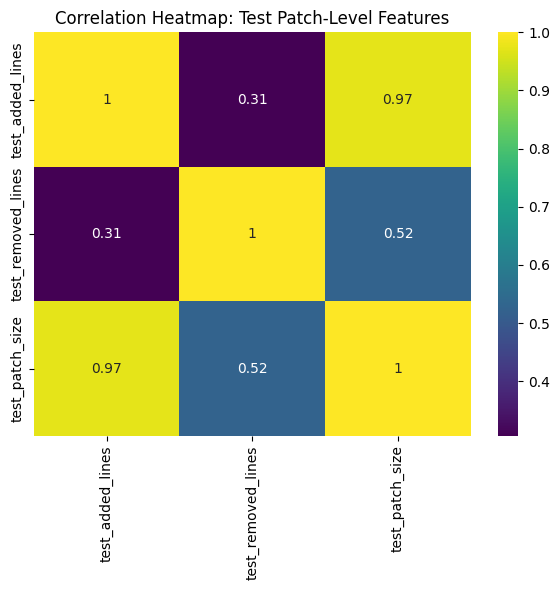

In [ ]:
import seaborn as sns

corr = df[[ "test_added_lines", "test_removed_lines", "test_patch_size"]].corr()

plt.figure(figsize=(6,6))
sns.heatmap(corr, annot=True, cmap="viridis")
plt.title("Correlation Heatmap: Test Patch-Level Features")
plt.tight_layout()
plt.savefig(os.path.join(Save_path, "correlation_heatmap_test_patch_features.pdf"))
plt.show()


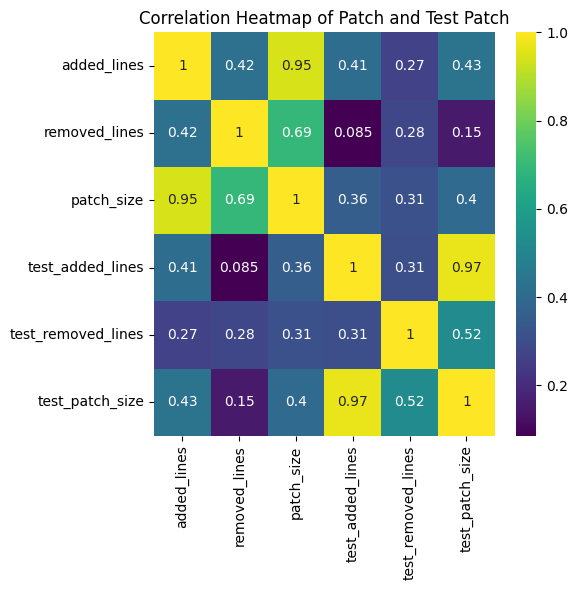

In [ ]:
import seaborn as sns

corr = df[["added_lines", "removed_lines", "patch_size","test_added_lines", "test_removed_lines", "test_patch_size"]].corr()

plt.figure(figsize=(6,6))
sns.heatmap(corr, annot=True, cmap="viridis")
plt.title("Correlation Heatmap of Patch and Test Patch")
plt.tight_layout()
plt.savefig(os.path.join(Save_path, "correlation_heatmap_both_patch_features.pdf"))
plt.show()


In [ ]:
df["has_test_patch"] = df["test_patch_size"] > 0
df["has_patch"] = df["patch_size"] > 0

# Count of patch types
df.groupby(["has_patch","has_test_patch"]).size()


has_patch  has_test_patch
True       True              300
dtype: int64

/tmp/ipython-input-255244560.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="repo", y="test_patch_size", data=df, palette="Set2")


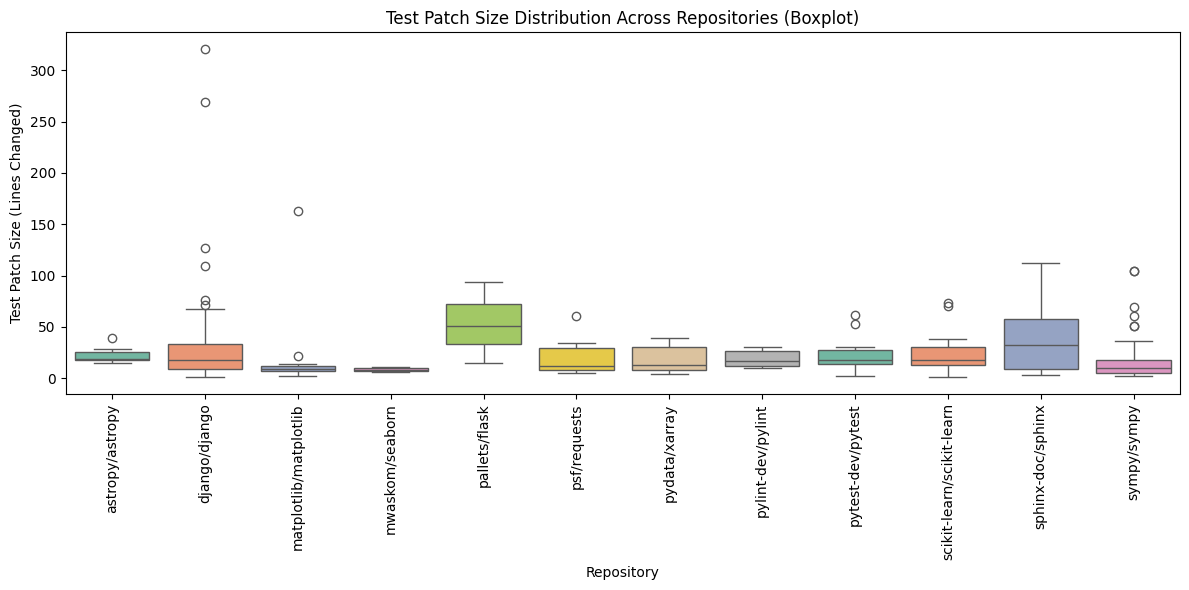

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="repo", y="test_patch_size", data=df, palette="Set2")
# plt.xticks(rotation=45)
plt.title("Test Patch Size Distribution Across Repositories (Boxplot)")
plt.xlabel("Repository")
plt.ylabel("Test Patch Size (Lines Changed)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(os.path.join(Save_path, "test_patch_total_distribution_across_repos.pdf"))
plt.show()



In [ ]:
df.to_csv(os.path.join(Save_path, "df_v2.csv"), index=False)


## FAIL_TO_PASS/ PASS_TO_PASS

In [ ]:
df = pd.read_csv(os.path.join(Save_path, "df_v2.csv"))
cols_to_remove = ['added_lines', 'removed_lines', 'test_added_lines', 'test_removed_lines','has_test_patch', 'has_patch']
df = df.drop(columns=cols_to_remove)
df.head()

repo             instance_id  \
0  astropy/astropy  astropy__astropy-12907   
1  astropy/astropy  astropy__astropy-14182   
2  astropy/astropy  astropy__astropy-14365   
3  astropy/astropy  astropy__astropy-14995   
4  astropy/astropy   astropy__astropy-6938   

                                               patch  \
0  diff --git a/astropy/modeling/separable.py b/a...   
1  diff --git a/astropy/io/ascii/rst.py b/astropy...   
2  diff --git a/astropy/io/ascii/qdp.py b/astropy...   
3  diff --git a/astropy/nddata/mixins/ndarithmeti...   
4  diff --git a/astropy/io/fits/fitsrec.py b/astr...   

                                          test_patch  \
0  diff --git a/astropy/modeling/tests/test_separ...   
1  diff --git a/astropy/io/ascii/tests/test_rst.p...   
2  diff --git a/astropy/io/ascii/tests/test_qdp.p...   
3  diff --git a/astropy/nddata/mixins/tests/test_...   
4  diff --git a/astropy/io/fits/tests/test_checks...   

                                   problem_statement  \
0  Modeling's `separability_matrix` does not comp...   
1  Please support header rows in RestructuredText...   
2  ascii.qdp Table format assumes QDP commands ar...   
3  In v5.3, NDDataRef mask propagation fails when...   
4  Possible bug in io.fits related to D exponents...   

                                          hints_text  version  \
0                                                NaN      4.3   
1                                                NaN      5.1   
2  Welcome to Astropy 👋 and thank you for your fi...      5.1   
3  Welcome to Astropy 👋 and thank you for your fi...      5.2   
4  It is tested with `astropy/io/fits/tests/test_...      1.3   

                                        FAIL_TO_PASS  \
0  ["astropy/modeling/tests/test_separable.py::te...   
1  ["astropy/io/ascii/tests/test_rst.py::test_rst...   
2  ["astropy/io/ascii/tests/test_qdp.py::test_rou...   
3  ["astropy/nddata/mixins/tests/test_ndarithmeti...   
4  ["astropy/io/fits/tests/test_checksum.py::Test...   

                                        PASS_TO_PASS  n_files_touched  \
0  ["astropy/modeling/tests/test_separable.py::te...                1   
1  ["astropy/io/ascii/tests/test_rst.py::test_rea...                1   
2  ["astropy/io/ascii/tests/test_qdp.py::test_get...                1   
3  ["astropy/nddata/mixins/tests/test_ndarithmeti...                1   
4  ["astropy/io/fits/tests/test_checksum.py::Test...                1   

   patch_size  n_test_files_touched  test_patch_size  
0           2                     1               19  
1          41                     1               28  
2           4                     1               15  
3           4                     1               39  
4           2                     2               17

In [ ]:
df["FAIL_TO_PASS"][0]

'["astropy/modeling/tests/test_separable.py::test_separable[compound_model6-result6]", "astropy/modeling/tests/test_separable.py::test_separable[compound_model9-result9]"]'

In [ ]:
import ast  # safe conversion from string/list in your dataframe

def count_tests(col_value):
    """Count number of tests in a column (FAIL_TO_PASS or PASS_TO_PASS)."""
    if col_value is None:
        return 0
    if isinstance(col_value, list):
        return len(col_value)
    # sometimes it may be stored as a string representation of a list
    try:
        lst = ast.literal_eval(col_value)
        if isinstance(lst, list):
            return len(lst)
        return 0
    except Exception:
        return 0

df["num_FAIL_TO_PASS"] = df["FAIL_TO_PASS"].apply(count_tests)
df["num_PASS_TO_PASS"] = df["PASS_TO_PASS"].apply(count_tests)


In [ ]:
cols_to_remove = ['FAIL_TO_PASS', 'PASS_TO_PASS']
df = df.drop(columns=cols_to_remove)
df.head()

repo             instance_id  \
0  astropy/astropy  astropy__astropy-12907   
1  astropy/astropy  astropy__astropy-14182   
2  astropy/astropy  astropy__astropy-14365   
3  astropy/astropy  astropy__astropy-14995   
4  astropy/astropy   astropy__astropy-6938   

                                               patch  \
0  diff --git a/astropy/modeling/separable.py b/a...   
1  diff --git a/astropy/io/ascii/rst.py b/astropy...   
2  diff --git a/astropy/io/ascii/qdp.py b/astropy...   
3  diff --git a/astropy/nddata/mixins/ndarithmeti...   
4  diff --git a/astropy/io/fits/fitsrec.py b/astr...   

                                          test_patch  \
0  diff --git a/astropy/modeling/tests/test_separ...   
1  diff --git a/astropy/io/ascii/tests/test_rst.p...   
2  diff --git a/astropy/io/ascii/tests/test_qdp.p...   
3  diff --git a/astropy/nddata/mixins/tests/test_...   
4  diff --git a/astropy/io/fits/tests/test_checks...   

                                   problem_statement  \
0  Modeling's `separability_matrix` does not comp...   
1  Please support header rows in RestructuredText...   
2  ascii.qdp Table format assumes QDP commands ar...   
3  In v5.3, NDDataRef mask propagation fails when...   
4  Possible bug in io.fits related to D exponents...   

                                          hints_text  version  \
0                                                NaN      4.3   
1                                                NaN      5.1   
2  Welcome to Astropy 👋 and thank you for your fi...      5.1   
3  Welcome to Astropy 👋 and thank you for your fi...      5.2   
4  It is tested with `astropy/io/fits/tests/test_...      1.3   

   n_files_touched  patch_size  n_test_files_touched  test_patch_size  \
0                1           2                     1               19   
1                1          41                     1               28   
2                1           4                     1               15   
3                1           4                     1               39   
4                1           2                     2               17   

   num_FAIL_TO_PASS  num_PASS_TO_PASS  
0                 2                13  
1                 1                 9  
2                 1                 8  
3                 1               179  
4                 2                11

In [ ]:
df[["num_FAIL_TO_PASS","num_PASS_TO_PASS"]].describe()

num_FAIL_TO_PASS  num_PASS_TO_PASS
count        300.000000        300.000000
mean           3.466667         81.713333
std           22.581600        149.319654
min            1.000000          0.000000
25%            1.000000         16.000000
50%            1.000000         44.000000
75%            2.000000         98.000000
max          355.000000       1689.000000

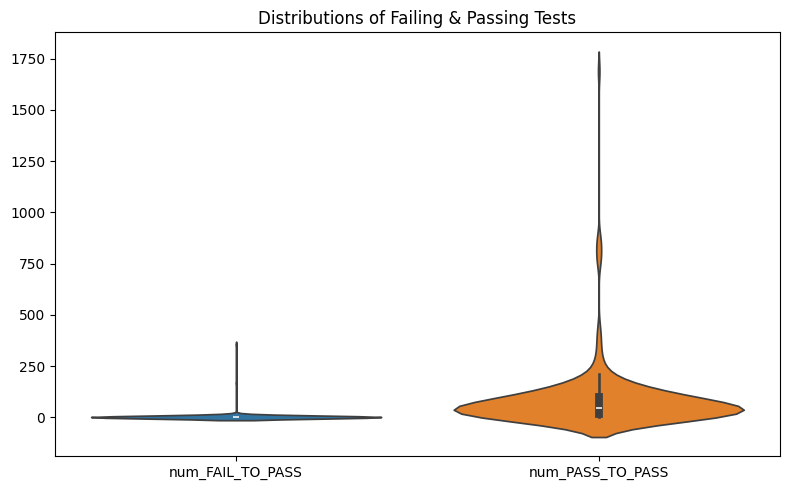

In [ ]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df[["num_FAIL_TO_PASS","num_PASS_TO_PASS"]])
plt.title("Distributions of Failing & Passing Tests")
plt.tight_layout()
plt.savefig(os.path.join(Save_path, "failing_passing_test_distributions.pdf"))
plt.show()


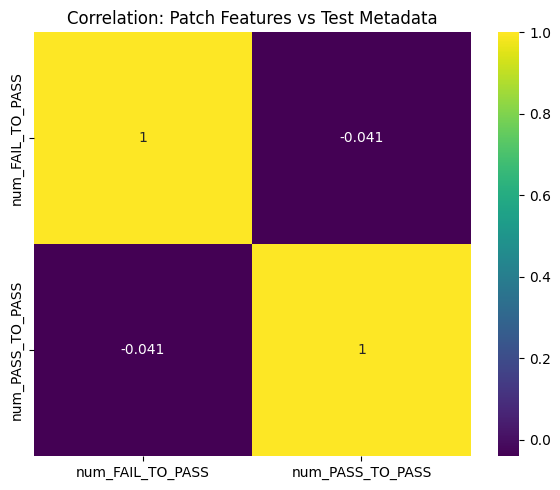

In [ ]:
corr = df[["num_FAIL_TO_PASS","num_PASS_TO_PASS"]].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="viridis")
plt.title("Correlation: Patch Features vs Test Metadata")
plt.tight_layout()
plt.show()


In [ ]:
df.to_csv(os.path.join(Save_path, "df_v3.csv"), index=False)

## version

In [ ]:
df = pd.read_csv(os.path.join(Save_path, "df_v3.csv"))
df.head()

repo             instance_id  \
0  astropy/astropy  astropy__astropy-12907   
1  astropy/astropy  astropy__astropy-14182   
2  astropy/astropy  astropy__astropy-14365   
3  astropy/astropy  astropy__astropy-14995   
4  astropy/astropy   astropy__astropy-6938   

                                               patch  \
0  diff --git a/astropy/modeling/separable.py b/a...   
1  diff --git a/astropy/io/ascii/rst.py b/astropy...   
2  diff --git a/astropy/io/ascii/qdp.py b/astropy...   
3  diff --git a/astropy/nddata/mixins/ndarithmeti...   
4  diff --git a/astropy/io/fits/fitsrec.py b/astr...   

                                          test_patch  \
0  diff --git a/astropy/modeling/tests/test_separ...   
1  diff --git a/astropy/io/ascii/tests/test_rst.p...   
2  diff --git a/astropy/io/ascii/tests/test_qdp.p...   
3  diff --git a/astropy/nddata/mixins/tests/test_...   
4  diff --git a/astropy/io/fits/tests/test_checks...   

                                   problem_statement  \
0  Modeling's `separability_matrix` does not comp...   
1  Please support header rows in RestructuredText...   
2  ascii.qdp Table format assumes QDP commands ar...   
3  In v5.3, NDDataRef mask propagation fails when...   
4  Possible bug in io.fits related to D exponents...   

                                          hints_text  version  \
0                                                NaN      4.3   
1                                                NaN      5.1   
2  Welcome to Astropy 👋 and thank you for your fi...      5.1   
3  Welcome to Astropy 👋 and thank you for your fi...      5.2   
4  It is tested with `astropy/io/fits/tests/test_...      1.3   

   n_files_touched  patch_size  n_test_files_touched  test_patch_size  \
0                1           2                     1               19   
1                1          41                     1               28   
2                1           4                     1               15   
3                1           4                     1               39   
4                1           2                     2               17   

   num_FAIL_TO_PASS  num_PASS_TO_PASS  
0                 2                13  
1                 1                 9  
2                 1                 8  
3                 1               179  
4                 2                11

In [ ]:
print("number of unique versions: " + str(len(list(set(list(df["version"]))))))

number of unique versions: 51


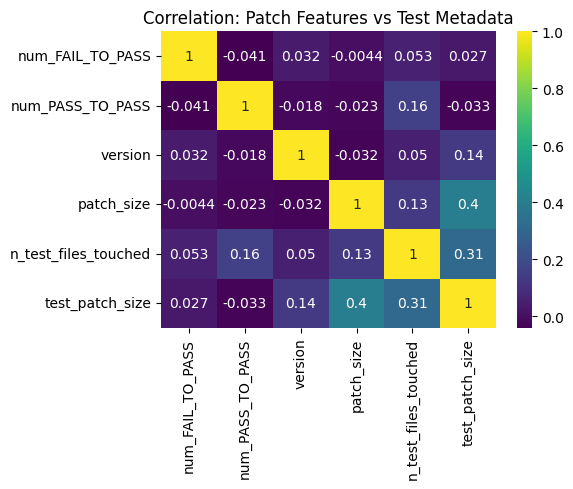

In [ ]:
corr = df[["num_FAIL_TO_PASS","num_PASS_TO_PASS", "version", "patch_size", "n_test_files_touched", "test_patch_size"]].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="viridis")
plt.title("Correlation: Patch Features vs Test Metadata")
plt.tight_layout()
plt.show()


## hints_text

In [ ]:
# Replace NaN with empty string
df["hints_text"] = df["hints_text"].fillna("")

# Boolean: does the instance have a hint?
df["has_hint"] = df["hints_text"].apply(lambda x: len(x.strip()) > 0)

# Word count of hint text
df["hint_length"] = df["hints_text"].apply(lambda x: len(x.split()))

df.head()

repo             instance_id  \
0  astropy/astropy  astropy__astropy-12907   
1  astropy/astropy  astropy__astropy-14182   
2  astropy/astropy  astropy__astropy-14365   
3  astropy/astropy  astropy__astropy-14995   
4  astropy/astropy   astropy__astropy-6938   

                                               patch  \
0  diff --git a/astropy/modeling/separable.py b/a...   
1  diff --git a/astropy/io/ascii/rst.py b/astropy...   
2  diff --git a/astropy/io/ascii/qdp.py b/astropy...   
3  diff --git a/astropy/nddata/mixins/ndarithmeti...   
4  diff --git a/astropy/io/fits/fitsrec.py b/astr...   

                                          test_patch  \
0  diff --git a/astropy/modeling/tests/test_separ...   
1  diff --git a/astropy/io/ascii/tests/test_rst.p...   
2  diff --git a/astropy/io/ascii/tests/test_qdp.p...   
3  diff --git a/astropy/nddata/mixins/tests/test_...   
4  diff --git a/astropy/io/fits/tests/test_checks...   

                                   problem_statement  \
0  Modeling's `separability_matrix` does not comp...   
1  Please support header rows in RestructuredText...   
2  ascii.qdp Table format assumes QDP commands ar...   
3  In v5.3, NDDataRef mask propagation fails when...   
4  Possible bug in io.fits related to D exponents...   

                                          hints_text  version  \
0                                                         4.3   
1                                                         5.1   
2  Welcome to Astropy 👋 and thank you for your fi...      5.1   
3  Welcome to Astropy 👋 and thank you for your fi...      5.2   
4  It is tested with `astropy/io/fits/tests/test_...      1.3   

   n_files_touched  patch_size  n_test_files_touched  test_patch_size  \
0                1           2                     1               19   
1                1          41                     1               28   
2                1           4                     1               15   
3                1           4                     1               39   
4                1           2                     2               17   

   num_FAIL_TO_PASS  num_PASS_TO_PASS  has_hint  hint_length  
0                 2                13     False            0  
1                 1                 9     False            0  
2                 1                 8      True          206  
3                 1               179      True          808  
4                 2                11      True           55

In [ ]:
df["has_hint"].value_counts()

has_hint
True     223
False     77
Name: count, dtype: int64

In [ ]:
df[["hint_length"]].describe()

hint_length
count   300.000000
mean    198.390000
std     327.024762
min       0.000000
25%       0.000000
50%      66.000000
75%     231.500000
max    2131.000000

## problem statement

In [ ]:
# Fill missing problem statements with empty string
df["problem_statement"] = df["problem_statement"].fillna("")

# Number of words
df["problem_length_words"] = df["problem_statement"].apply(lambda x: len(x.split()))

# Quick view
df[["problem_length_words"]].describe()


problem_length_words
count            300.000000
mean             174.573333
std              162.838774
min               41.000000
25%               88.750000
50%              134.000000
75%              208.000000
max             1892.000000

In [ ]:
df.to_csv(os.path.join(Save_path, "df_v4.csv"), index=False)

In [ ]:
df.head()

repo             instance_id  \
0  astropy/astropy  astropy__astropy-12907   
1  astropy/astropy  astropy__astropy-14182   
2  astropy/astropy  astropy__astropy-14365   
3  astropy/astropy  astropy__astropy-14995   
4  astropy/astropy   astropy__astropy-6938   

                                               patch  \
0  diff --git a/astropy/modeling/separable.py b/a...   
1  diff --git a/astropy/io/ascii/rst.py b/astropy...   
2  diff --git a/astropy/io/ascii/qdp.py b/astropy...   
3  diff --git a/astropy/nddata/mixins/ndarithmeti...   
4  diff --git a/astropy/io/fits/fitsrec.py b/astr...   

                                          test_patch  \
0  diff --git a/astropy/modeling/tests/test_separ...   
1  diff --git a/astropy/io/ascii/tests/test_rst.p...   
2  diff --git a/astropy/io/ascii/tests/test_qdp.p...   
3  diff --git a/astropy/nddata/mixins/tests/test_...   
4  diff --git a/astropy/io/fits/tests/test_checks...   

                                   problem_statement  \
0  Modeling's `separability_matrix` does not comp...   
1  Please support header rows in RestructuredText...   
2  ascii.qdp Table format assumes QDP commands ar...   
3  In v5.3, NDDataRef mask propagation fails when...   
4  Possible bug in io.fits related to D exponents...   

                                          hints_text  version  \
0                                                         4.3   
1                                                         5.1   
2  Welcome to Astropy 👋 and thank you for your fi...      5.1   
3  Welcome to Astropy 👋 and thank you for your fi...      5.2   
4  It is tested with `astropy/io/fits/tests/test_...      1.3   

   n_files_touched  patch_size  n_test_files_touched  test_patch_size  \
0                1           2                     1               19   
1                1          41                     1               28   
2                1           4                     1               15   
3                1           4                     1               39   
4                1           2                     2               17   

   num_FAIL_TO_PASS  num_PASS_TO_PASS  has_hint  hint_length  \
0                 2                13     False            0   
1                 1                 9     False            0   
2                 1                 8      True          206   
3                 1               179      True          808   
4                 2                11      True           55   

   problem_length_words  
0                   158  
1                   189  
2                   202  
3                   357  
4                    76

# Problem statement+hint classification

## Github Labels

In [ ]:
# Load the AIC classifier (with truncation for long issues)
classifier = pipeline(
    "text-classification",
    model="vinaykarman/robertabase",
    return_all_scores=True,
    truncation=True,
    max_length=512
)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/799 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/958 [00:00<?, ?B/s]

Device set to use cpu
/usr/local/lib/python3.12/dist-packages/transformers/pipelines/text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
# Mapping from model labels to human-readable
label_map = {
    "LABEL_0": "bug",
    "LABEL_1": "enhancement",
    "LABEL_2": "question",
    "LABEL_3": "documentation",
    "LABEL_4": "others"
}

# Function to classify a single problem statement
def classify_issue(text, threshold=0.0):
    """
    Returns top label and all label scores.
    threshold=0.0 ensures all scores are included
    """
    results = classifier(text)[0]  # pipeline returns a list of lists

    # Keep all label scores with mapped names
    all_scores = [{"label": label_map.get(r['label'], r['label']),
                   "score": r['score']} for r in results]

    # Get the top label (highest score)
    top = max(all_scores, key=lambda x: x['score'])

    return {"top_label": [top['label']],   # single-element list
            "top_score": top['score'],
            "all_scores": all_scores}      # list of dicts

In [ ]:
# Apply to entire dataset
top_labels = []
top_scores = []
all_label_scores = []

for text in tqdm(df['problem_statement'], desc="Classifying issues"):
    res = classify_issue(text)
    top_labels.append(res['top_label'])
    top_scores.append(res['top_score'])
    all_label_scores.append(res['all_scores'])

df['predicted_GH_labels'] = top_labels      # single-element list
df['predicted_scores'] = top_scores      # probability of top label
df['all_label_scores'] = all_label_scores  # all labels and their scores


Classifying issues: 100%|██████████| 300/300 [07:38<00:00,  1.53s/it]


In [ ]:
df['predicted_GH_labels'] = df['predicted_GH_labels'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)
df.head()

repo             instance_id  \
0  astropy/astropy  astropy__astropy-12907   
1  astropy/astropy  astropy__astropy-14182   
2  astropy/astropy  astropy__astropy-14365   
3  astropy/astropy  astropy__astropy-14995   
4  astropy/astropy   astropy__astropy-6938   

                                               patch  \
0  diff --git a/astropy/modeling/separable.py b/a...   
1  diff --git a/astropy/io/ascii/rst.py b/astropy...   
2  diff --git a/astropy/io/ascii/qdp.py b/astropy...   
3  diff --git a/astropy/nddata/mixins/ndarithmeti...   
4  diff --git a/astropy/io/fits/fitsrec.py b/astr...   

                                          test_patch  \
0  diff --git a/astropy/modeling/tests/test_separ...   
1  diff --git a/astropy/io/ascii/tests/test_rst.p...   
2  diff --git a/astropy/io/ascii/tests/test_qdp.p...   
3  diff --git a/astropy/nddata/mixins/tests/test_...   
4  diff --git a/astropy/io/fits/tests/test_checks...   

                                   problem_statement  \
0  Modeling's `separability_matrix` does not comp...   
1  Please support header rows in RestructuredText...   
2  ascii.qdp Table format assumes QDP commands ar...   
3  In v5.3, NDDataRef mask propagation fails when...   
4  Possible bug in io.fits related to D exponents...   

                                          hints_text  version  \
0                                                         4.3   
1                                                         5.1   
2  Welcome to Astropy 👋 and thank you for your fi...      5.1   
3  Welcome to Astropy 👋 and thank you for your fi...      5.2   
4  It is tested with `astropy/io/fits/tests/test_...      1.3   

   n_files_touched  patch_size  n_test_files_touched  test_patch_size  \
0                1           2                     1               19   
1                1          41                     1               28   
2                1           4                     1               15   
3                1           4                     1               39   
4                1           2                     2               17   

   num_FAIL_TO_PASS  num_PASS_TO_PASS  has_hint  hint_length  \
0                 2                13     False            0   
1                 1                 9     False            0   
2                 1                 8      True          206   
3                 1               179      True          808   
4                 2                11      True           55   

   problem_length_words predicted_GH_labels  predicted_scores  \
0                   158                 bug          0.792346   
1                   189         enhancement          0.999485   
2                   202                 bug          0.998833   
3                   357                 bug          0.999328   
4                    76                 bug          0.999293   

                                    all_label_scores  
0  [{'label': 'bug', 'score': 0.7923456430435181}...  
1  [{'label': 'bug', 'score': 0.00020413256424944...  
2  [{'label': 'bug', 'score': 0.9988325238227844}...  
3  [{'label': 'bug', 'score': 0.9993282556533813}...  
4  [{'label': 'bug', 'score': 0.999293327331543},...

In [ ]:
df.to_csv(os.path.join(Save_path, "df_v5.csv"), index=False)

In [ ]:
# Count the number of issues per predicted label
label_counts = df['predicted_GH_labels'].value_counts()
print(label_counts)

predicted_GH_labels
bug            226
enhancement     60
question        14
Name: count, dtype: int64


/tmp/ipython-input-3159562536.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='predicted_GH_labels', data=df, palette='Set2')


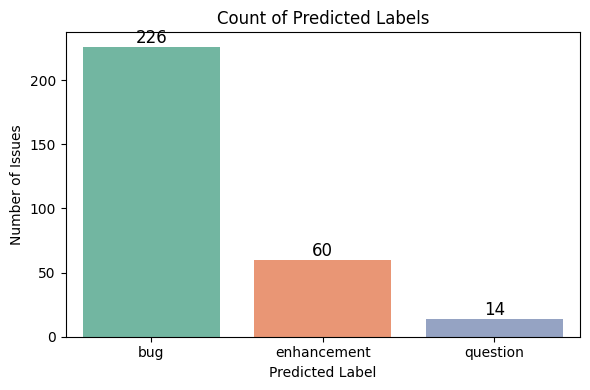

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
ax = sns.countplot(x='predicted_GH_labels', data=df, palette='Set2')

# Add counts on top of each bar
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}',
                (p.get_x() + p.get_width() / 2., count),  # position
                ha='center', va='bottom', fontsize=12)

plt.title("Count of Predicted Labels")
plt.xlabel("Predicted Label")
plt.ylabel("Number of Issues")
# Save as PDF
plt.tight_layout()
plt.savefig(os.path.join(Save_path, "predicted_GH_label_counts.pdf"))
plt.show()


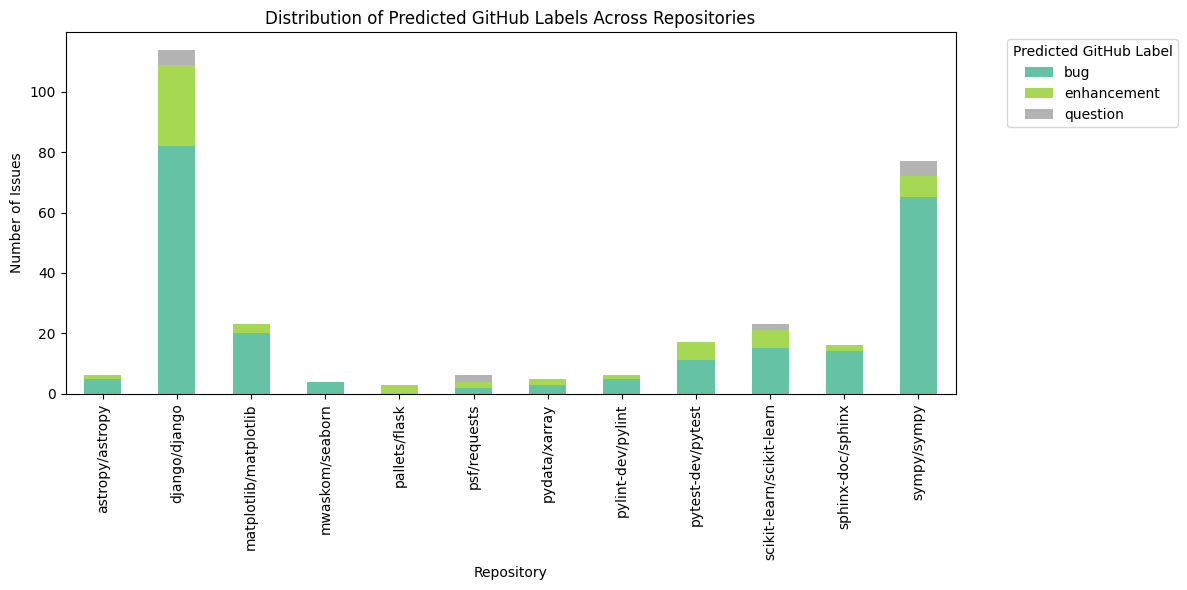

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute counts
label_repo_counts = df.groupby(["repo", "predicted_GH_labels"]).size().unstack(fill_value=0)

# Plot stacked bar
label_repo_counts.plot(kind="bar", stacked=True, figsize=(12,6), colormap="Set2")
plt.title("Distribution of Predicted GitHub Labels Across Repositories")
plt.xlabel("Repository")
plt.ylabel("Number of Issues")
plt.legend(title="Predicted GitHub Label", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(os.path.join(Save_path, "predicted_GH_label_distribution_across_repos.pdf"))
plt.show()


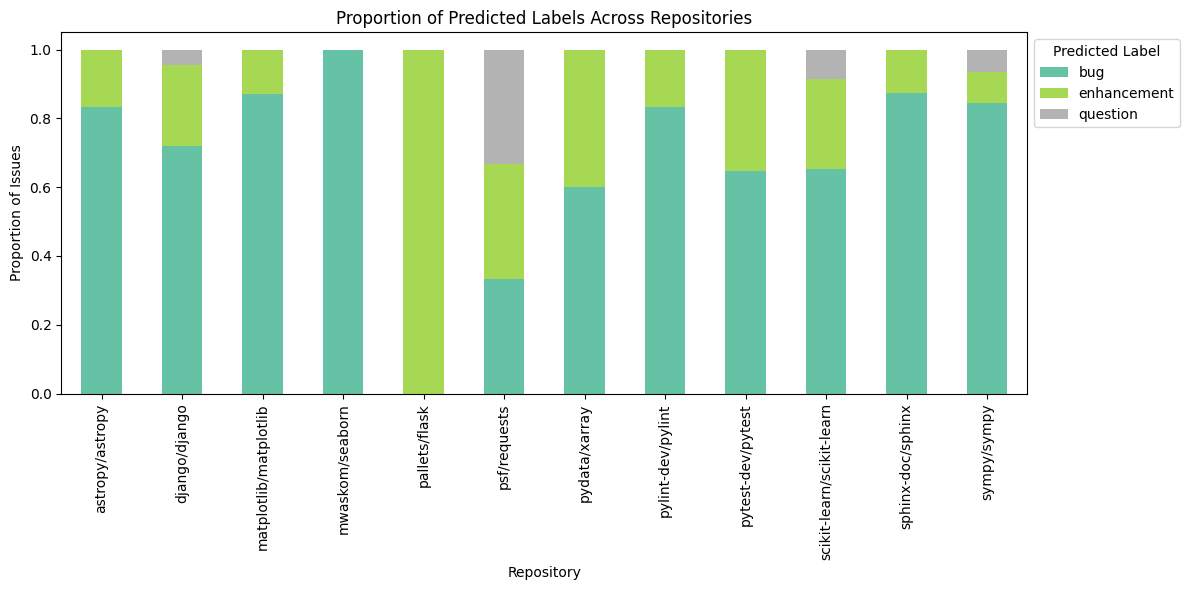

In [ ]:
# Normalize to proportions
label_repo_prop = label_repo_counts.div(label_repo_counts.sum(axis=1), axis=0)

label_repo_prop.plot(kind="bar", stacked=True, figsize=(12,6), colormap="Set2")
plt.title("Proportion of Predicted Labels Across Repositories")
plt.xlabel("Repository")
plt.ylabel("Proportion of Issues")
plt.legend(title="Predicted Label", bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(os.path.join(Save_path, "predicted_GH_label_proportion_across_repos.pdf"))
plt.show()


In [ ]:
cols_to_remove = ['predicted_scores', 'all_label_scores']
df = df.drop(columns=cols_to_remove)

In [ ]:
df.to_csv(os.path.join(Save_path, "df_v6.csv"), index=False)

## LDA

In [ ]:
df =pd.read_csv(os.path.join(Save_path, "df_v6.csv"))
df.head()

repo             instance_id  \
0  astropy/astropy  astropy__astropy-12907   
1  astropy/astropy  astropy__astropy-14182   
2  astropy/astropy  astropy__astropy-14365   
3  astropy/astropy  astropy__astropy-14995   
4  astropy/astropy   astropy__astropy-6938   

                                               patch  \
0  diff --git a/astropy/modeling/separable.py b/a...   
1  diff --git a/astropy/io/ascii/rst.py b/astropy...   
2  diff --git a/astropy/io/ascii/qdp.py b/astropy...   
3  diff --git a/astropy/nddata/mixins/ndarithmeti...   
4  diff --git a/astropy/io/fits/fitsrec.py b/astr...   

                                          test_patch  \
0  diff --git a/astropy/modeling/tests/test_separ...   
1  diff --git a/astropy/io/ascii/tests/test_rst.p...   
2  diff --git a/astropy/io/ascii/tests/test_qdp.p...   
3  diff --git a/astropy/nddata/mixins/tests/test_...   
4  diff --git a/astropy/io/fits/tests/test_checks...   

                                   problem_statement  \
0  Modeling's `separability_matrix` does not comp...   
1  Please support header rows in RestructuredText...   
2  ascii.qdp Table format assumes QDP commands ar...   
3  In v5.3, NDDataRef mask propagation fails when...   
4  Possible bug in io.fits related to D exponents...   

                                          hints_text  version  \
0                                                NaN      4.3   
1                                                NaN      5.1   
2  Welcome to Astropy 👋 and thank you for your fi...      5.1   
3  Welcome to Astropy 👋 and thank you for your fi...      5.2   
4  It is tested with `astropy/io/fits/tests/test_...      1.3   

   n_files_touched  patch_size  n_test_files_touched  test_patch_size  \
0                1           2                     1               19   
1                1          41                     1               28   
2                1           4                     1               15   
3                1           4                     1               39   
4                1           2                     2               17   

   num_FAIL_TO_PASS  num_PASS_TO_PASS  has_hint  hint_length  \
0                 2                13     False            0   
1                 1                 9     False            0   
2                 1                 8      True          206   
3                 1               179      True          808   
4                 2                11      True           55   

   problem_length_words predicted_GH_labels  
0                   158                 bug  
1                   189         enhancement  
2                   202                 bug  
3                   357                 bug  
4                    76                 bug

In [ ]:
# Fill missing values with empty string
df['problem_statement'] = df['problem_statement'].fillna('')
df['hints_text'] = df['hints_text'].fillna('')

# Combine columns into a single text field
df['combined_text'] = df['problem_statement'] + " " + df['hints_text']


Basic Text Cleaning

Lowercasing

Remove punctuation

Remove stopwords

Tokenization

In [ ]:
stop_words = set(stopwords.words('english'))
custom_stopwords = stop_words.union({"import", "python", "def", "return", "class", "file", "line", "would"})

def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'\s+', ' ', text)  # remove extra whitespace
    text = re.sub(r'[^a-zA-Z ]', '', text)  # remove non-alphabetic chars
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and word not in custom_stopwords and len(word) > 2]
    return tokens

df['tokens'] = df['combined_text'].apply(clean_text)
df.head()


repo             instance_id  \
0  astropy/astropy  astropy__astropy-12907   
1  astropy/astropy  astropy__astropy-14182   
2  astropy/astropy  astropy__astropy-14365   
3  astropy/astropy  astropy__astropy-14995   
4  astropy/astropy   astropy__astropy-6938   

                                               patch  \
0  diff --git a/astropy/modeling/separable.py b/a...   
1  diff --git a/astropy/io/ascii/rst.py b/astropy...   
2  diff --git a/astropy/io/ascii/qdp.py b/astropy...   
3  diff --git a/astropy/nddata/mixins/ndarithmeti...   
4  diff --git a/astropy/io/fits/fitsrec.py b/astr...   

                                          test_patch  \
0  diff --git a/astropy/modeling/tests/test_separ...   
1  diff --git a/astropy/io/ascii/tests/test_rst.p...   
2  diff --git a/astropy/io/ascii/tests/test_qdp.p...   
3  diff --git a/astropy/nddata/mixins/tests/test_...   
4  diff --git a/astropy/io/fits/tests/test_checks...   

                                   problem_statement  \
0  Modeling's `separability_matrix` does not comp...   
1  Please support header rows in RestructuredText...   
2  ascii.qdp Table format assumes QDP commands ar...   
3  In v5.3, NDDataRef mask propagation fails when...   
4  Possible bug in io.fits related to D exponents...   

                                          hints_text  version  \
0                                                         4.3   
1                                                         5.1   
2  Welcome to Astropy 👋 and thank you for your fi...      5.1   
3  Welcome to Astropy 👋 and thank you for your fi...      5.2   
4  It is tested with `astropy/io/fits/tests/test_...      1.3   

   n_files_touched  patch_size  n_test_files_touched  test_patch_size  \
0                1           2                     1               19   
1                1          41                     1               28   
2                1           4                     1               15   
3                1           4                     1               39   
4                1           2                     2               17   

   num_FAIL_TO_PASS  num_PASS_TO_PASS  has_hint  hint_length  \
0                 2                13     False            0   
1                 1                 9     False            0   
2                 1                 8      True          206   
3                 1               179      True          808   
4                 2                11      True           55   

   problem_length_words predicted_GH_labels  \
0                   158                 bug   
1                   189         enhancement   
2                   202                 bug   
3                   357                 bug   
4                    76                 bug   

                                       combined_text  \
0  Modeling's `separability_matrix` does not comp...   
1  Please support header rows in RestructuredText...   
2  ascii.qdp Table format assumes QDP commands ar...   
3  In v5.3, NDDataRef mask propagation fails when...   
4  Possible bug in io.fits related to D exponents...   

                                              tokens  
0  [modelings, separabilitymatrix, compute, separ...  
1  [please, support, header, rows, restructuredte...  
2  [asciiqdp, table, format, assumes, qdp, comman...  
3  [nddataref, mask, propagation, fails, one, ope...  
4  [possible, bug, iofits, related, exponents, ca...

In [ ]:
from gensim import corpora

# Create dictionary
dictionary = corpora.Dictionary(df['tokens'])

# Filter extreme words (optional)
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Create corpus
corpus = [dictionary.doc2bow(text) for text in df['tokens']]


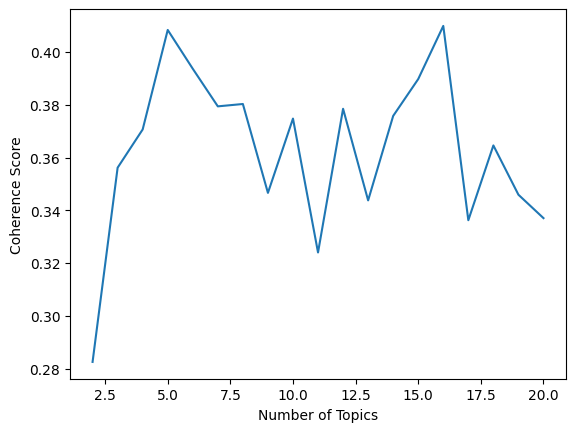

In [ ]:
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence(dictionary, corpus, texts, limit=10):
    coherence_values = []
    model_list = []
    for num_topics in range(2, limit+1):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

model_list, coherence_values = compute_coherence(dictionary, corpus, df['tokens'], limit=20)

# Plot coherence
import matplotlib.pyplot as plt
plt.plot(range(2,21), coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.savefig(os.path.join(Save_path, "coherence_plot.pdf"))
plt.show()


In [ ]:
best_num_topics = coherence_values.index(max(coherence_values)) + 2  # because range starts at 2
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=best_num_topics, random_state=42, passes=15)

# Print topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}\n")


Topic 0: 0.022*"model" + 0.019*"name" + 0.018*"value" + 0.018*"field" + 0.015*"django" + 0.014*"description" + 0.013*"order" + 0.013*"error" + 0.012*"models" + 0.010*"test"

Topic 1: 0.022*"pytest" + 0.018*"int" + 0.015*"time" + 0.013*"key" + 0.013*"primary" + 0.012*"integer" + 0.011*"float" + 0.011*"test" + 0.010*"type" + 0.010*"assert"

Topic 2: 0.050*"foo" + 0.037*"value" + 0.032*"none" + 0.019*"exception" + 0.018*"bar" + 0.015*"error" + 0.014*"test" + 0.014*"choices" + 0.013*"raise" + 0.013*"django"

Topic 3: 0.027*"none" + 0.026*"sphinx" + 0.024*"classes" + 0.022*"describe" + 0.020*"template" + 0.019*"members" + 0.018*"version" + 0.016*"bug" + 0.016*"expected" + 0.014*"reproduce"

Topic 4: 0.023*"sympy" + 0.019*"result" + 0.018*"matrix" + 0.015*"think" + 0.015*"like" + 0.014*"output" + 0.011*"work" + 0.011*"true" + 0.010*"dont" + 0.010*"code"

Topic 5: 0.016*"list" + 0.015*"one" + 0.012*"problem" + 0.012*"widget" + 0.012*"axis" + 0.011*"code" + 0.010*"use" + 0.010*"time" + 0.009*"

In [ ]:
def get_dominant_topic(ldamodel, corpus):
    topics = []
    for bow in corpus:
        topic_prob = ldamodel.get_document_topics(bow)
        dominant_topic = sorted(topic_prob, key=lambda x: x[1], reverse=True)[0][0]
        topics.append(dominant_topic)
    return topics

df['dominant_topic'] = get_dominant_topic(lda_model, corpus)


In [ ]:
df.head()

repo             instance_id  \
0  astropy/astropy  astropy__astropy-12907   
1  astropy/astropy  astropy__astropy-14182   
2  astropy/astropy  astropy__astropy-14365   
3  astropy/astropy  astropy__astropy-14995   
4  astropy/astropy   astropy__astropy-6938   

                                               patch  \
0  diff --git a/astropy/modeling/separable.py b/a...   
1  diff --git a/astropy/io/ascii/rst.py b/astropy...   
2  diff --git a/astropy/io/ascii/qdp.py b/astropy...   
3  diff --git a/astropy/nddata/mixins/ndarithmeti...   
4  diff --git a/astropy/io/fits/fitsrec.py b/astr...   

                                          test_patch  \
0  diff --git a/astropy/modeling/tests/test_separ...   
1  diff --git a/astropy/io/ascii/tests/test_rst.p...   
2  diff --git a/astropy/io/ascii/tests/test_qdp.p...   
3  diff --git a/astropy/nddata/mixins/tests/test_...   
4  diff --git a/astropy/io/fits/tests/test_checks...   

                                   problem_statement  \
0  Modeling's `separability_matrix` does not comp...   
1  Please support header rows in RestructuredText...   
2  ascii.qdp Table format assumes QDP commands ar...   
3  In v5.3, NDDataRef mask propagation fails when...   
4  Possible bug in io.fits related to D exponents...   

                                          hints_text  version  \
0                                                         4.3   
1                                                         5.1   
2  Welcome to Astropy 👋 and thank you for your fi...      5.1   
3  Welcome to Astropy 👋 and thank you for your fi...      5.2   
4  It is tested with `astropy/io/fits/tests/test_...      1.3   

   n_files_touched  patch_size  n_test_files_touched  test_patch_size  \
0                1           2                     1               19   
1                1          41                     1               28   
2                1           4                     1               15   
3                1           4                     1               39   
4                1           2                     2               17   

   num_FAIL_TO_PASS  num_PASS_TO_PASS  has_hint  hint_length  \
0                 2                13     False            0   
1                 1                 9     False            0   
2                 1                 8      True          206   
3                 1               179      True          808   
4                 2                11      True           55   

   problem_length_words predicted_GH_labels  \
0                   158                 bug   
1                   189         enhancement   
2                   202                 bug   
3                   357                 bug   
4                    76                 bug   

                                       combined_text  \
0  Modeling's `separability_matrix` does not comp...   
1  Please support header rows in RestructuredText...   
2  ascii.qdp Table format assumes QDP commands ar...   
3  In v5.3, NDDataRef mask propagation fails when...   
4  Possible bug in io.fits related to D exponents...   

                                              tokens  dominant_topic  
0  [modelings, separabilitymatrix, compute, separ...               8  
1  [please, support, header, rows, restructuredte...               6  
2  [asciiqdp, table, format, assumes, qdp, comman...              12  
3  [nddataref, mask, propagation, fails, one, ope...               6  
4  [possible, bug, iofits, related, exponents, ca...               4

In [ ]:
# Save LDA model
lda_model.save("lda_swebench.model")

# Save dictionary
dictionary.save("lda_swebench.dict")

# Save corpus (optional, can be large)
import pickle
with open(Save_path +"/corpus_swebench.pkl", "wb") as f:
    pickle.dump(corpus, f)


In [ ]:
####how to load for later:
# from gensim.models import LdaModel
# from gensim.corpora import Dictionary
# import pickle

# # Load model
# lda_model = LdaModel.load("lda_swebench.model")

# # Load dictionary
# dictionary = Dictionary.load("lda_swebench.dict")

# # Load corpus
# with open("corpus_swebench.pkl", "rb") as f:
#     corpus = pickle.load(f)


In [ ]:
# Count number of issues per topic
topic_counts = df['dominant_topic'].value_counts().sort_index()
print(topic_counts)

dominant_topic
0     31
1     20
2      8
3     11
4     21
5     12
6     80
7     24
8     15
9      9
10     4
11    15
12    19
13    13
14    17
15     1
Name: count, dtype: int64


/tmp/ipython-input-2740690765.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_counts.index, y=topic_counts.values, palette="Set2")


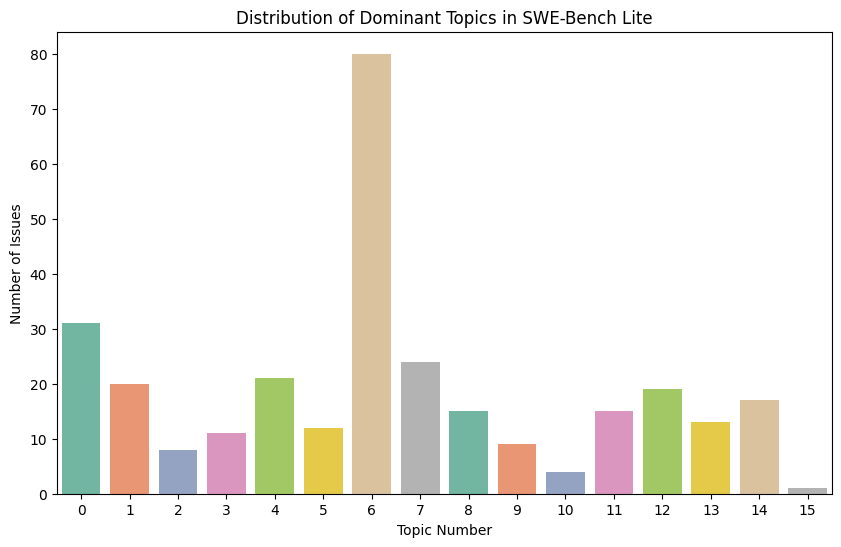

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=topic_counts.index, y=topic_counts.values, palette="Set2")
plt.xlabel("Topic Number")
plt.ylabel("Number of Issues")
plt.title("Distribution of Dominant Topics in SWE-Bench Lite")
plt.xticks(rotation=0)
plt.show()


In [ ]:
# Create a pivot table: rows = repo, columns = dominant_topic, values = counts
topic_repo_counts = df.pivot_table(index='repo',
                                   columns='dominant_topic',
                                   aggfunc='size',
                                   fill_value=0)

# Check the table
print(topic_repo_counts.head())


dominant_topic         0   1   2   3   4   5   6   7   8   9   10  11  12  13  \
repo                                                                            
astropy/astropy         0   0   0   0   1   0   2   0   1   0   0   0   1   0   
django/django          28   4   5   0   4   2  26  10   2   4   0   1  14  11   
matplotlib/matplotlib   0   1   0   0   0   2   7   0   1   0   0  11   0   0   
mwaskom/seaborn         0   0   0   1   0   1   1   0   0   0   0   0   0   0   
pallets/flask           1   0   0   0   0   1   1   0   0   0   0   0   0   0   

dominant_topic         14  15  
repo                           
astropy/astropy         1   0  
django/django           3   0  
matplotlib/matplotlib   1   0  
mwaskom/seaborn         1   0  
pallets/flask           0   0  


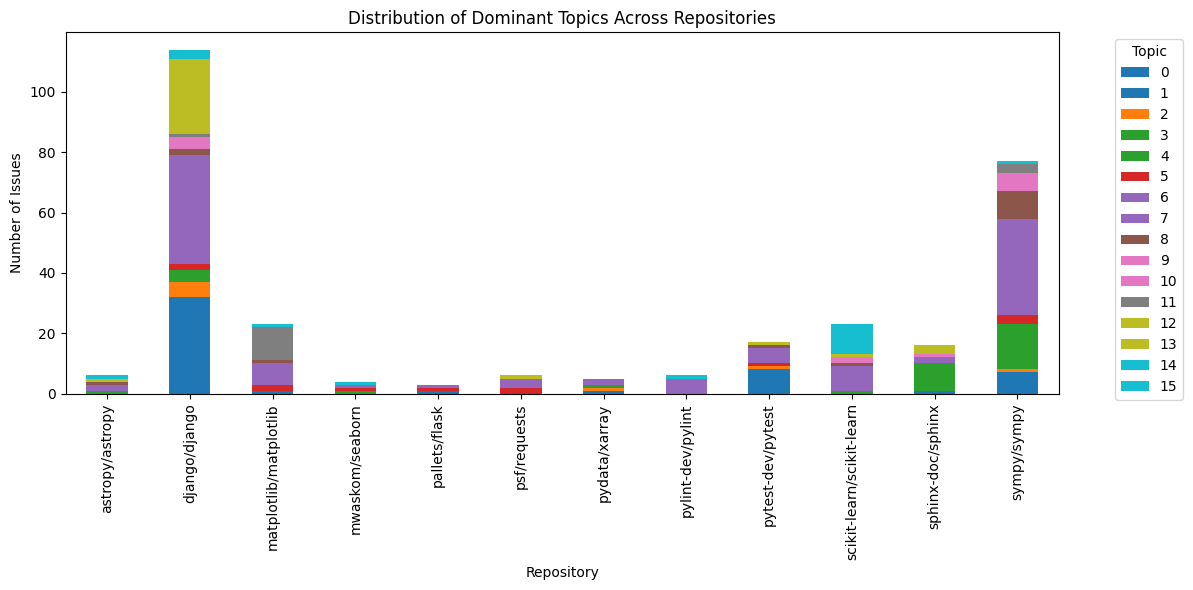

In [ ]:
topic_repo_counts.plot(kind='bar',
                       stacked=True,
                       figsize=(12,6),
                       colormap='tab10')

plt.xlabel("Repository")
plt.ylabel("Number of Issues")
plt.title("Distribution of Dominant Topics Across Repositories")
plt.legend(title="Topic", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


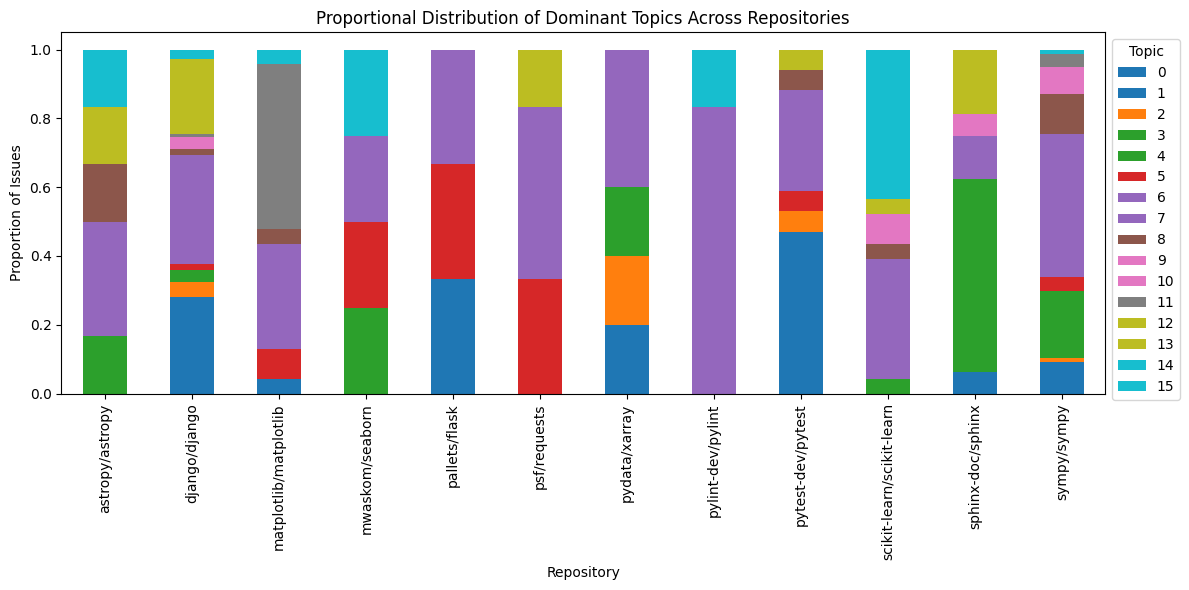

In [ ]:
topic_repo_percent = topic_repo_counts.div(topic_repo_counts.sum(axis=1), axis=0)

topic_repo_percent.plot(kind='bar',
                        stacked=True,
                        figsize=(12,6),
                        colormap='tab10')

plt.xlabel("Repository")
plt.ylabel("Proportion of Issues")
plt.title("Proportional Distribution of Dominant Topics Across Repositories")
plt.legend(title="Topic", bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(Save_path, "topic_repo_percent.pdf"))
plt.show()


In [ ]:
df.head()

repo             instance_id  \
0  astropy/astropy  astropy__astropy-12907   
1  astropy/astropy  astropy__astropy-14182   
2  astropy/astropy  astropy__astropy-14365   
3  astropy/astropy  astropy__astropy-14995   
4  astropy/astropy   astropy__astropy-6938   

                                               patch  \
0  diff --git a/astropy/modeling/separable.py b/a...   
1  diff --git a/astropy/io/ascii/rst.py b/astropy...   
2  diff --git a/astropy/io/ascii/qdp.py b/astropy...   
3  diff --git a/astropy/nddata/mixins/ndarithmeti...   
4  diff --git a/astropy/io/fits/fitsrec.py b/astr...   

                                          test_patch  \
0  diff --git a/astropy/modeling/tests/test_separ...   
1  diff --git a/astropy/io/ascii/tests/test_rst.p...   
2  diff --git a/astropy/io/ascii/tests/test_qdp.p...   
3  diff --git a/astropy/nddata/mixins/tests/test_...   
4  diff --git a/astropy/io/fits/tests/test_checks...   

                                   problem_statement  \
0  Modeling's `separability_matrix` does not comp...   
1  Please support header rows in RestructuredText...   
2  ascii.qdp Table format assumes QDP commands ar...   
3  In v5.3, NDDataRef mask propagation fails when...   
4  Possible bug in io.fits related to D exponents...   

                                          hints_text  version  \
0                                                         4.3   
1                                                         5.1   
2  Welcome to Astropy 👋 and thank you for your fi...      5.1   
3  Welcome to Astropy 👋 and thank you for your fi...      5.2   
4  It is tested with `astropy/io/fits/tests/test_...      1.3   

   n_files_touched  patch_size  n_test_files_touched  test_patch_size  \
0                1           2                     1               19   
1                1          41                     1               28   
2                1           4                     1               15   
3                1           4                     1               39   
4                1           2                     2               17   

   num_FAIL_TO_PASS  num_PASS_TO_PASS  has_hint  hint_length  \
0                 2                13     False            0   
1                 1                 9     False            0   
2                 1                 8      True          206   
3                 1               179      True          808   
4                 2                11      True           55   

   problem_length_words predicted_GH_labels  \
0                   158                 bug   
1                   189         enhancement   
2                   202                 bug   
3                   357                 bug   
4                    76                 bug   

                                       combined_text  \
0  Modeling's `separability_matrix` does not comp...   
1  Please support header rows in RestructuredText...   
2  ascii.qdp Table format assumes QDP commands ar...   
3  In v5.3, NDDataRef mask propagation fails when...   
4  Possible bug in io.fits related to D exponents...   

                                              tokens  dominant_topic  
0  [modelings, separabilitymatrix, compute, separ...               8  
1  [please, support, header, rows, restructuredte...               6  
2  [asciiqdp, table, format, assumes, qdp, comman...              12  
3  [nddataref, mask, propagation, fails, one, ope...               6  
4  [possible, bug, iofits, related, exponents, ca...               4

### LDA vs GH labels

In [ ]:
# Cross-tab of dominant_topic vs predicted GitHub labels
topic_label_ct = pd.crosstab(df['dominant_topic'], df['predicted_GH_labels'])

print(topic_label_ct)
topic_label_percent = topic_label_ct.div(topic_label_ct.sum(axis=1), axis=0)
print(topic_label_percent)

predicted_GH_labels  bug  enhancement  question
dominant_topic                                 
0                     21            6         4
1                     14            6         0
2                      8            0         0
3                      9            2         0
4                     18            2         1
5                      8            4         0
6                     53           21         6
7                     18            4         2
8                     12            3         0
9                      7            2         0
10                     4            0         0
11                    14            1         0
12                    14            4         1
13                    10            3         0
14                    15            2         0
15                     1            0         0
predicted_GH_labels       bug  enhancement  question
dominant_topic                                      
0                    0.677419 

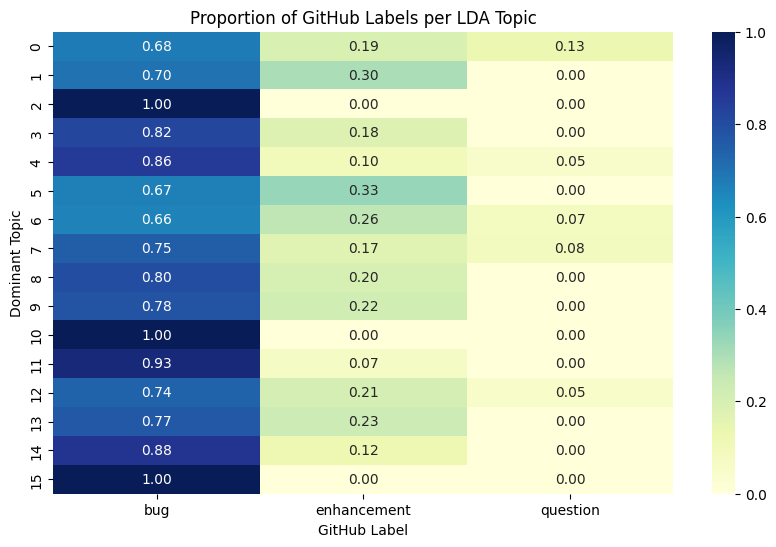

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(topic_label_percent, annot=True, fmt=".2f", cmap="YlGnBu")
plt.xlabel("GitHub Label")
plt.ylabel("Dominant Topic")
plt.title("Proportion of GitHub Labels per LDA Topic")
plt.show()


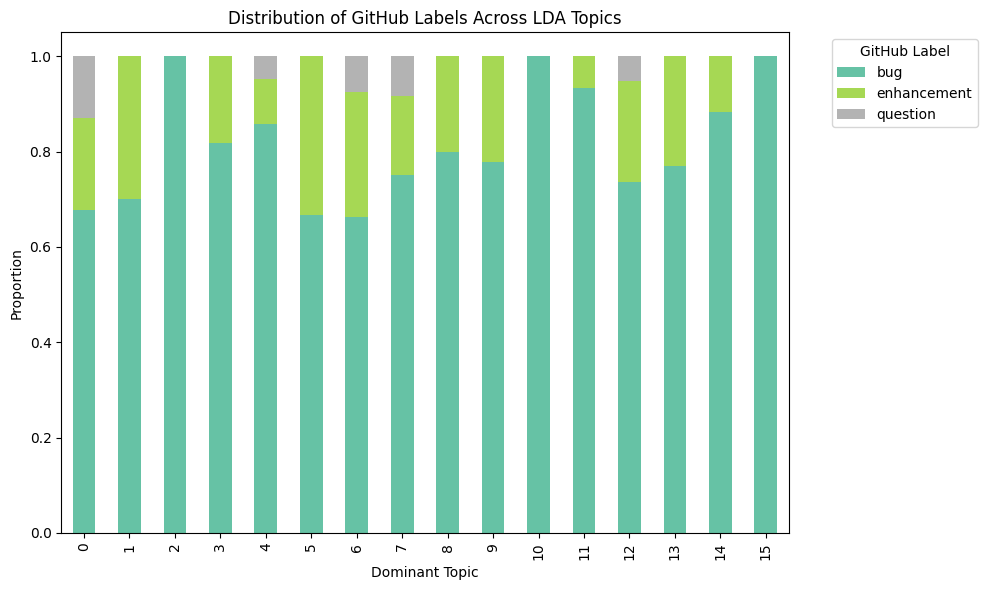

In [ ]:
topic_label_percent.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')

plt.xlabel("Dominant Topic")
plt.ylabel("Proportion")
plt.title("Distribution of GitHub Labels Across LDA Topics")
plt.legend(title="GitHub Label", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
df.to_csv(os.path.join(Save_path, "df_v7.csv"), index=False)

## HDBSCAN

In [ ]:
df = pd.read_csv(os.path.join(Save_path, "df_v7.csv"))
df.head()

repo             instance_id  \
0  astropy/astropy  astropy__astropy-12907   
1  astropy/astropy  astropy__astropy-14182   
2  astropy/astropy  astropy__astropy-14365   
3  astropy/astropy  astropy__astropy-14995   
4  astropy/astropy   astropy__astropy-6938   

                                               patch  \
0  diff --git a/astropy/modeling/separable.py b/a...   
1  diff --git a/astropy/io/ascii/rst.py b/astropy...   
2  diff --git a/astropy/io/ascii/qdp.py b/astropy...   
3  diff --git a/astropy/nddata/mixins/ndarithmeti...   
4  diff --git a/astropy/io/fits/fitsrec.py b/astr...   

                                          test_patch  \
0  diff --git a/astropy/modeling/tests/test_separ...   
1  diff --git a/astropy/io/ascii/tests/test_rst.p...   
2  diff --git a/astropy/io/ascii/tests/test_qdp.p...   
3  diff --git a/astropy/nddata/mixins/tests/test_...   
4  diff --git a/astropy/io/fits/tests/test_checks...   

                                   problem_statement  \
0  Modeling's `separability_matrix` does not comp...   
1  Please support header rows in RestructuredText...   
2  ascii.qdp Table format assumes QDP commands ar...   
3  In v5.3, NDDataRef mask propagation fails when...   
4  Possible bug in io.fits related to D exponents...   

                                          hints_text  version  \
0                                                NaN      4.3   
1                                                NaN      5.1   
2  Welcome to Astropy 👋 and thank you for your fi...      5.1   
3  Welcome to Astropy 👋 and thank you for your fi...      5.2   
4  It is tested with `astropy/io/fits/tests/test_...      1.3   

   n_files_touched  patch_size  n_test_files_touched  test_patch_size  \
0                1           2                     1               19   
1                1          41                     1               28   
2                1           4                     1               15   
3                1           4                     1               39   
4                1           2                     2               17   

   num_FAIL_TO_PASS  num_PASS_TO_PASS  has_hint  hint_length  \
0                 2                13     False            0   
1                 1                 9     False            0   
2                 1                 8      True          206   
3                 1               179      True          808   
4                 2                11      True           55   

   problem_length_words predicted_GH_labels  \
0                   158                 bug   
1                   189         enhancement   
2                   202                 bug   
3                   357                 bug   
4                    76                 bug   

                                       combined_text  \
0  Modeling's `separability_matrix` does not comp...   
1  Please support header rows in RestructuredText...   
2  ascii.qdp Table format assumes QDP commands ar...   
3  In v5.3, NDDataRef mask propagation fails when...   
4  Possible bug in io.fits related to D exponents...   

                                              tokens  dominant_topic  
0  ['modelings', 'separabilitymatrix', 'compute',...               8  
1  ['please', 'support', 'header', 'rows', 'restr...               6  
2  ['asciiqdp', 'table', 'format', 'assumes', 'qd...              12  
3  ['nddataref', 'mask', 'propagation', 'fails', ...               6  
4  ['possible', 'bug', 'iofits', 'related', 'expo...               4

### clustering

In [ ]:
cols_to_remove = ['combined_text', 'tokens']
df = df.drop(columns=cols_to_remove)
df.head()

repo             instance_id  \
0  astropy/astropy  astropy__astropy-12907   
1  astropy/astropy  astropy__astropy-14182   
2  astropy/astropy  astropy__astropy-14365   
3  astropy/astropy  astropy__astropy-14995   
4  astropy/astropy   astropy__astropy-6938   

                                               patch  \
0  diff --git a/astropy/modeling/separable.py b/a...   
1  diff --git a/astropy/io/ascii/rst.py b/astropy...   
2  diff --git a/astropy/io/ascii/qdp.py b/astropy...   
3  diff --git a/astropy/nddata/mixins/ndarithmeti...   
4  diff --git a/astropy/io/fits/fitsrec.py b/astr...   

                                          test_patch  \
0  diff --git a/astropy/modeling/tests/test_separ...   
1  diff --git a/astropy/io/ascii/tests/test_rst.p...   
2  diff --git a/astropy/io/ascii/tests/test_qdp.p...   
3  diff --git a/astropy/nddata/mixins/tests/test_...   
4  diff --git a/astropy/io/fits/tests/test_checks...   

                                   problem_statement  \
0  Modeling's `separability_matrix` does not comp...   
1  Please support header rows in RestructuredText...   
2  ascii.qdp Table format assumes QDP commands ar...   
3  In v5.3, NDDataRef mask propagation fails when...   
4  Possible bug in io.fits related to D exponents...   

                                          hints_text  version  \
0                                                NaN      4.3   
1                                                NaN      5.1   
2  Welcome to Astropy 👋 and thank you for your fi...      5.1   
3  Welcome to Astropy 👋 and thank you for your fi...      5.2   
4  It is tested with `astropy/io/fits/tests/test_...      1.3   

   n_files_touched  patch_size  n_test_files_touched  test_patch_size  \
0                1           2                     1               19   
1                1          41                     1               28   
2                1           4                     1               15   
3                1           4                     1               39   
4                1           2                     2               17   

   num_FAIL_TO_PASS  num_PASS_TO_PASS  has_hint  hint_length  \
0                 2                13     False            0   
1                 1                 9     False            0   
2                 1                 8      True          206   
3                 1               179      True          808   
4                 2                11      True           55   

   problem_length_words predicted_GH_labels  dominant_topic  
0                   158                 bug               8  
1                   189         enhancement               6  
2                   202                 bug              12  
3                   357                 bug               6  
4                    76                 bug               4

In [ ]:
stop_words = set(stopwords.words('english'))
custom_stopwords = {"import", "python", "def", "return", "class", "file", "line", "would"}
all_stopwords = stop_words.union(custom_stopwords)

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^a-zA-Z ]', '', text)
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in all_stopwords and len(word) > 2]
    return ' '.join(tokens)  # HDBSCAN works on embeddings of full text

df['clean_text'] = (df['problem_statement'].fillna('') + ' ' + df['hints_text'].fillna('')).apply(clean_text)
df.head()

repo             instance_id  \
0  astropy/astropy  astropy__astropy-12907   
1  astropy/astropy  astropy__astropy-14182   
2  astropy/astropy  astropy__astropy-14365   
3  astropy/astropy  astropy__astropy-14995   
4  astropy/astropy   astropy__astropy-6938   

                                               patch  \
0  diff --git a/astropy/modeling/separable.py b/a...   
1  diff --git a/astropy/io/ascii/rst.py b/astropy...   
2  diff --git a/astropy/io/ascii/qdp.py b/astropy...   
3  diff --git a/astropy/nddata/mixins/ndarithmeti...   
4  diff --git a/astropy/io/fits/fitsrec.py b/astr...   

                                          test_patch  \
0  diff --git a/astropy/modeling/tests/test_separ...   
1  diff --git a/astropy/io/ascii/tests/test_rst.p...   
2  diff --git a/astropy/io/ascii/tests/test_qdp.p...   
3  diff --git a/astropy/nddata/mixins/tests/test_...   
4  diff --git a/astropy/io/fits/tests/test_checks...   

                                   problem_statement  \
0  Modeling's `separability_matrix` does not comp...   
1  Please support header rows in RestructuredText...   
2  ascii.qdp Table format assumes QDP commands ar...   
3  In v5.3, NDDataRef mask propagation fails when...   
4  Possible bug in io.fits related to D exponents...   

                                          hints_text  version  \
0                                                NaN      4.3   
1                                                NaN      5.1   
2  Welcome to Astropy 👋 and thank you for your fi...      5.1   
3  Welcome to Astropy 👋 and thank you for your fi...      5.2   
4  It is tested with `astropy/io/fits/tests/test_...      1.3   

   n_files_touched  patch_size  n_test_files_touched  test_patch_size  \
0                1           2                     1               19   
1                1          41                     1               28   
2                1           4                     1               15   
3                1           4                     1               39   
4                1           2                     2               17   

   num_FAIL_TO_PASS  num_PASS_TO_PASS  has_hint  hint_length  \
0                 2                13     False            0   
1                 1                 9     False            0   
2                 1                 8      True          206   
3                 1               179      True          808   
4                 2                11      True           55   

   problem_length_words predicted_GH_labels  dominant_topic  \
0                   158                 bug               8   
1                   189         enhancement               6   
2                   202                 bug              12   
3                   357                 bug               6   
4                    76                 bug               4   

                                          clean_text  
0  modelings separabilitymatrix compute separabil...  
1  please support header rows restructuredtext ou...  
2  asciiqdp table format assumes qdp commands upp...  
3  nddataref mask propagation fails one operand m...  
4  possible bug iofits related exponents came acr...

In [ ]:
from sentence_transformers import SentenceTransformer

# Load pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings
embeddings = model.encode(df['clean_text'].tolist(), show_progress_bar=True)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
import umap
import hdbscan
import numpy as np

# Dimensions to try
dims_to_test = [5, 10, 15, 20, 25]
results = []
for n_dim in dims_to_test:
    # Reduce embeddings to n_dim dimensions
    umap_model = umap.UMAP(n_neighbors=15, n_components=n_dim, metric='cosine', random_state=42)
    reduced = umap_model.fit_transform(embeddings)

    # Cluster with HDBSCAN
    clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=5, metric='euclidean', cluster_selection_method='eom')
    labels = clusterer.fit_predict(reduced)

    # Compute metrics
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    noise_fraction = np.sum(labels == -1) / len(labels)

    results.append((n_dim, n_clusters, noise_fraction))

# Convert to DataFrame for easy inspection
import pandas as pd
results_df = pd.DataFrame(results, columns=['n_dimensions', 'n_clusters', 'noise_fraction'])
print(results_df)


/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  

   n_dimensions  n_clusters  noise_fraction
0             5           7        0.113333
1            10           7        0.140000
2            15           7        0.093333
3            20           7        0.110000
4            25           7        0.116667


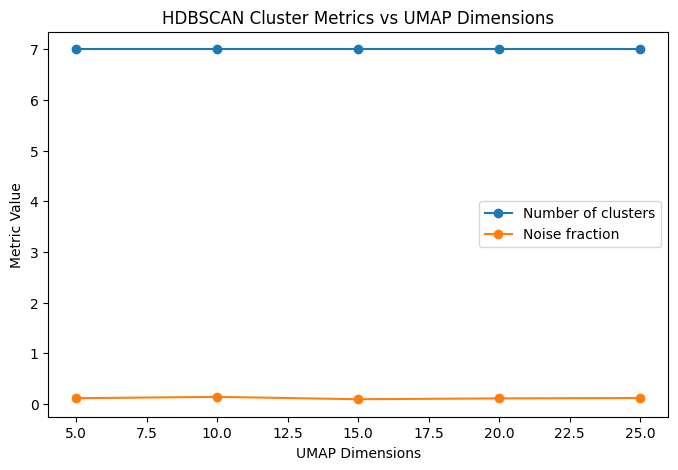

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(results_df['n_dimensions'], results_df['n_clusters'], marker='o', label='Number of clusters')
plt.plot(results_df['n_dimensions'], results_df['noise_fraction'], marker='o', label='Noise fraction')
plt.xlabel("UMAP Dimensions")
plt.ylabel("Metric Value")
plt.title("HDBSCAN Cluster Metrics vs UMAP Dimensions")
plt.legend()
plt.show()


In [ ]:
print("Original embedding shape:", embeddings.shape)


Original embedding shape: (300, 384)


In [ ]:
import umap

# Reduce embeddings to 15
umap_model = umap.UMAP(n_neighbors=15, n_components=15, metric='cosine', random_state=42)
reduced_embeddings = umap_model.fit_transform(embeddings)

print(reduced_embeddings.shape)


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


(300, 15)


In [ ]:
import hdbscan

# Initialize HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=10,  # minimum size of cluster
                            min_samples=5,       # sensitivity
                            metric='euclidean',
                            cluster_selection_method='eom')

# Fit HDBSCAN
cluster_labels = clusterer.fit_predict(reduced_embeddings)

# Assign to DataFrame
df['hdbscan_topic'] = cluster_labels

# Check cluster counts
print(df['hdbscan_topic'].value_counts())


hdbscan_topic
 0    116
 6     48
-1     28
 4     27
 2     26
 3     24
 1     16
 5     15
Name: count, dtype: int64


### analysis

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


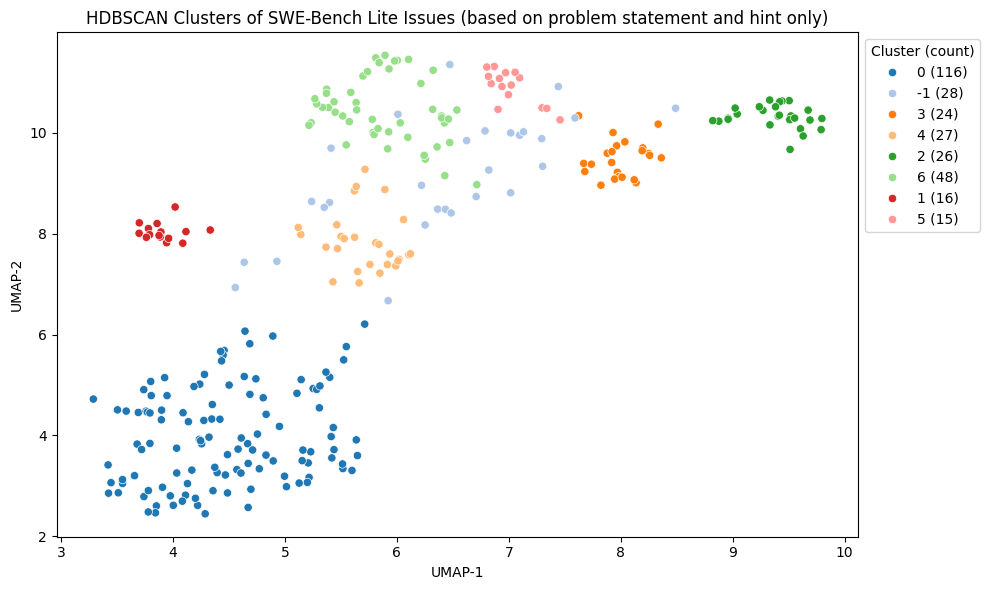

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Reduce to 2D for plotting
umap_2d = umap.UMAP(n_neighbors=15, n_components=2, metric='cosine', random_state=42)
reduced_2d = umap_2d.fit_transform(embeddings)

# Add 2D coordinates to DataFrame
df['umap_2d_x'] = reduced_2d[:,0]
df['umap_2d_y'] = reduced_2d[:,1]

# Compute cluster counts for legend
cluster_counts = df['hdbscan_topic'].value_counts().sort_index()
cluster_labels = [f"{c} ({cluster_counts[c]})" for c in cluster_counts.index]

# Map cluster values to labels
label_map = dict(zip(cluster_counts.index, cluster_labels))
df['cluster_label'] = df['hdbscan_topic'].map(label_map)

plt.figure(figsize=(10,6))
sns.scatterplot(x='umap_2d_x', y='umap_2d_y', hue='cluster_label', data=df, palette='tab20', legend='full')

plt.title("HDBSCAN Clusters of SWE-Bench Lite Issues (based on problem statement and hint only)")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.legend(title="Cluster (count)", bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(Save_path, "HDBSCAN_clusters_problem_statement_only.pdf"))
plt.show()


In [ ]:
df.to_csv(os.path.join(Save_path, "df_v8.csv"), index=False)

<Axes: ylabel='$\\lambda$ value'>

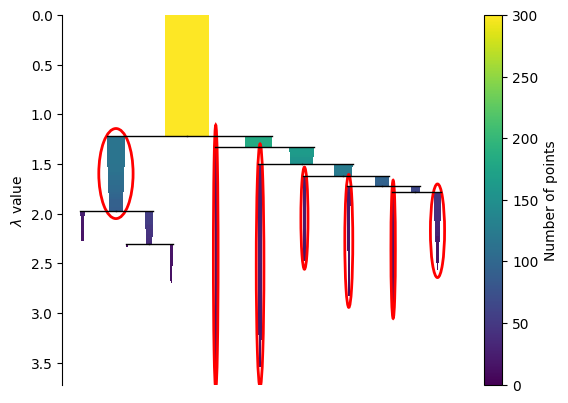

In [ ]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette='tab20', colorbar=True)

In [ ]:
# Cluster labels (-1 = noise)
df['hdbscan_topic'] = clusterer.labels_

# For a specific cluster ID
cluster_id = 0
cluster_points = df[df['hdbscan_topic'] == cluster_id]
print(cluster_points['problem_statement'].head())


0    Modeling's `separability_matrix` does not comp...
6    Set default FILE_UPLOAD_PERMISSION to 0o644.\n...
7    Allow FilePathField path to accept a callable....
8    Incorrect removal of order_by clause created a...
9    Merging 3 or more media objects can throw unne...
Name: problem_statement, dtype: object


<Axes: ylabel='$\\lambda$ value'>

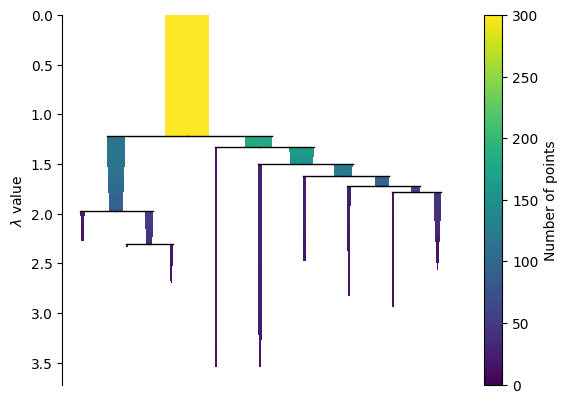

In [ ]:
# Plot full tree (all subclusters)
clusterer.condensed_tree_.plot()


In [ ]:
import pickle

# Save HDBSCAN model
with open(Save_path + "/hdbscan_model.pkl", "wb") as f:
    pickle.dump(clusterer, f)


In [ ]:
# #######how to load
# import pickle

# with open("hdbscan_model.pkl", "rb") as f:
#     clusterer = pickle.load(f)

# # Access labels again
# labels = clusterer.labels_


In [ ]:
import numpy as np
import pandas as pd

cluster_ids = sorted([c for c in df['hdbscan_topic'].unique() if c != -1])

cluster_centroids = []
cluster_labels = []

for cid in cluster_ids:
    points = reduced_embeddings[df['hdbscan_topic'] == cid]
    centroid = points.mean(axis=0)
    cluster_centroids.append(centroid)
    cluster_labels.append(f"Cluster {cid}")

cluster_centroids = np.vstack(cluster_centroids)


In [ ]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
# Pairwise distances between cluster centroids
distance_matrix = pdist(cluster_centroids, metric='euclidean')

# Hierarchical linkage
Z = linkage(distance_matrix, method='ward')


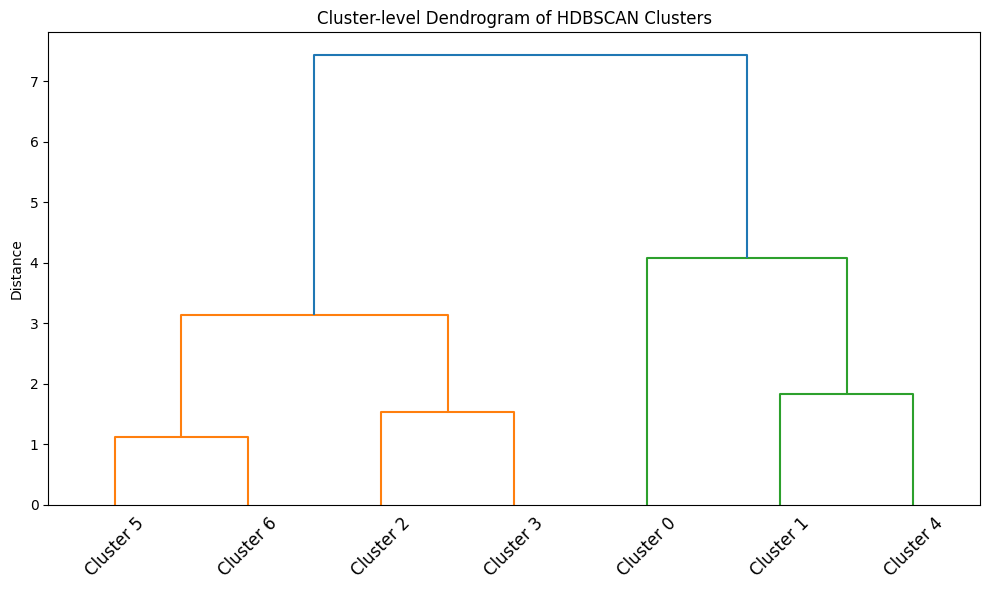

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(10, 6))
dendrogram(
    Z,
    labels=cluster_labels,
    leaf_rotation=45,
    leaf_font_size=12
)

plt.title("Cluster-level Dendrogram of HDBSCAN Clusters")
plt.ylabel("Distance")
plt.tight_layout()
plt.savefig(os.path.join(Save_path, "cluster_level_PS_dendrogram.pdf"))
plt.show()


In [ ]:
df.head()

repo             instance_id  \
0  astropy/astropy  astropy__astropy-12907   
1  astropy/astropy  astropy__astropy-14182   
2  astropy/astropy  astropy__astropy-14365   
3  astropy/astropy  astropy__astropy-14995   
4  astropy/astropy   astropy__astropy-6938   

                                               patch  \
0  diff --git a/astropy/modeling/separable.py b/a...   
1  diff --git a/astropy/io/ascii/rst.py b/astropy...   
2  diff --git a/astropy/io/ascii/qdp.py b/astropy...   
3  diff --git a/astropy/nddata/mixins/ndarithmeti...   
4  diff --git a/astropy/io/fits/fitsrec.py b/astr...   

                                          test_patch  \
0  diff --git a/astropy/modeling/tests/test_separ...   
1  diff --git a/astropy/io/ascii/tests/test_rst.p...   
2  diff --git a/astropy/io/ascii/tests/test_qdp.p...   
3  diff --git a/astropy/nddata/mixins/tests/test_...   
4  diff --git a/astropy/io/fits/tests/test_checks...   

                                   problem_statement  \
0  Modeling's `separability_matrix` does not comp...   
1  Please support header rows in RestructuredText...   
2  ascii.qdp Table format assumes QDP commands ar...   
3  In v5.3, NDDataRef mask propagation fails when...   
4  Possible bug in io.fits related to D exponents...   

                                          hints_text  version  \
0                                                NaN      4.3   
1                                                NaN      5.1   
2  Welcome to Astropy 👋 and thank you for your fi...      5.1   
3  Welcome to Astropy 👋 and thank you for your fi...      5.2   
4  It is tested with `astropy/io/fits/tests/test_...      1.3   

   n_files_touched  patch_size  n_test_files_touched  ...  has_hint  \
0                1           2                     1  ...     False   
1                1          41                     1  ...     False   
2                1           4                     1  ...      True   
3                1           4                     1  ...      True   
4                1           2                     2  ...      True   

   hint_length  problem_length_words  predicted_GH_labels  dominant_topic  \
0            0                   158                  bug               8   
1            0                   189          enhancement               6   
2          206                   202                  bug              12   
3          808                   357                  bug               6   
4           55                    76                  bug               4   

                                          clean_text hdbscan_topic  umap_2d_x  \
0  modelings separabilitymatrix compute separabil...             0   4.580876   
1  please support header rows restructuredtext ou...            -1   6.820786   
2  asciiqdp table format assumes qdp commands upp...            -1   6.707686   
3  nddataref mask propagation fails one operand m...             3   7.623391   
4  possible bug iofits related exponents came acr...            -1   6.008768   

   umap_2d_y  cluster_label  
0   3.729980        0 (116)  
1   9.262818        -1 (28)  
2   8.736577        -1 (28)  
3  10.338848         3 (24)  
4  10.368047        -1 (28)  

[5 rows x 23 columns]

In [ ]:
cluster_texts = (
    df
    .groupby('hdbscan_topic')['clean_text']
    .apply(lambda x: ' '.join(x.dropna()))
)

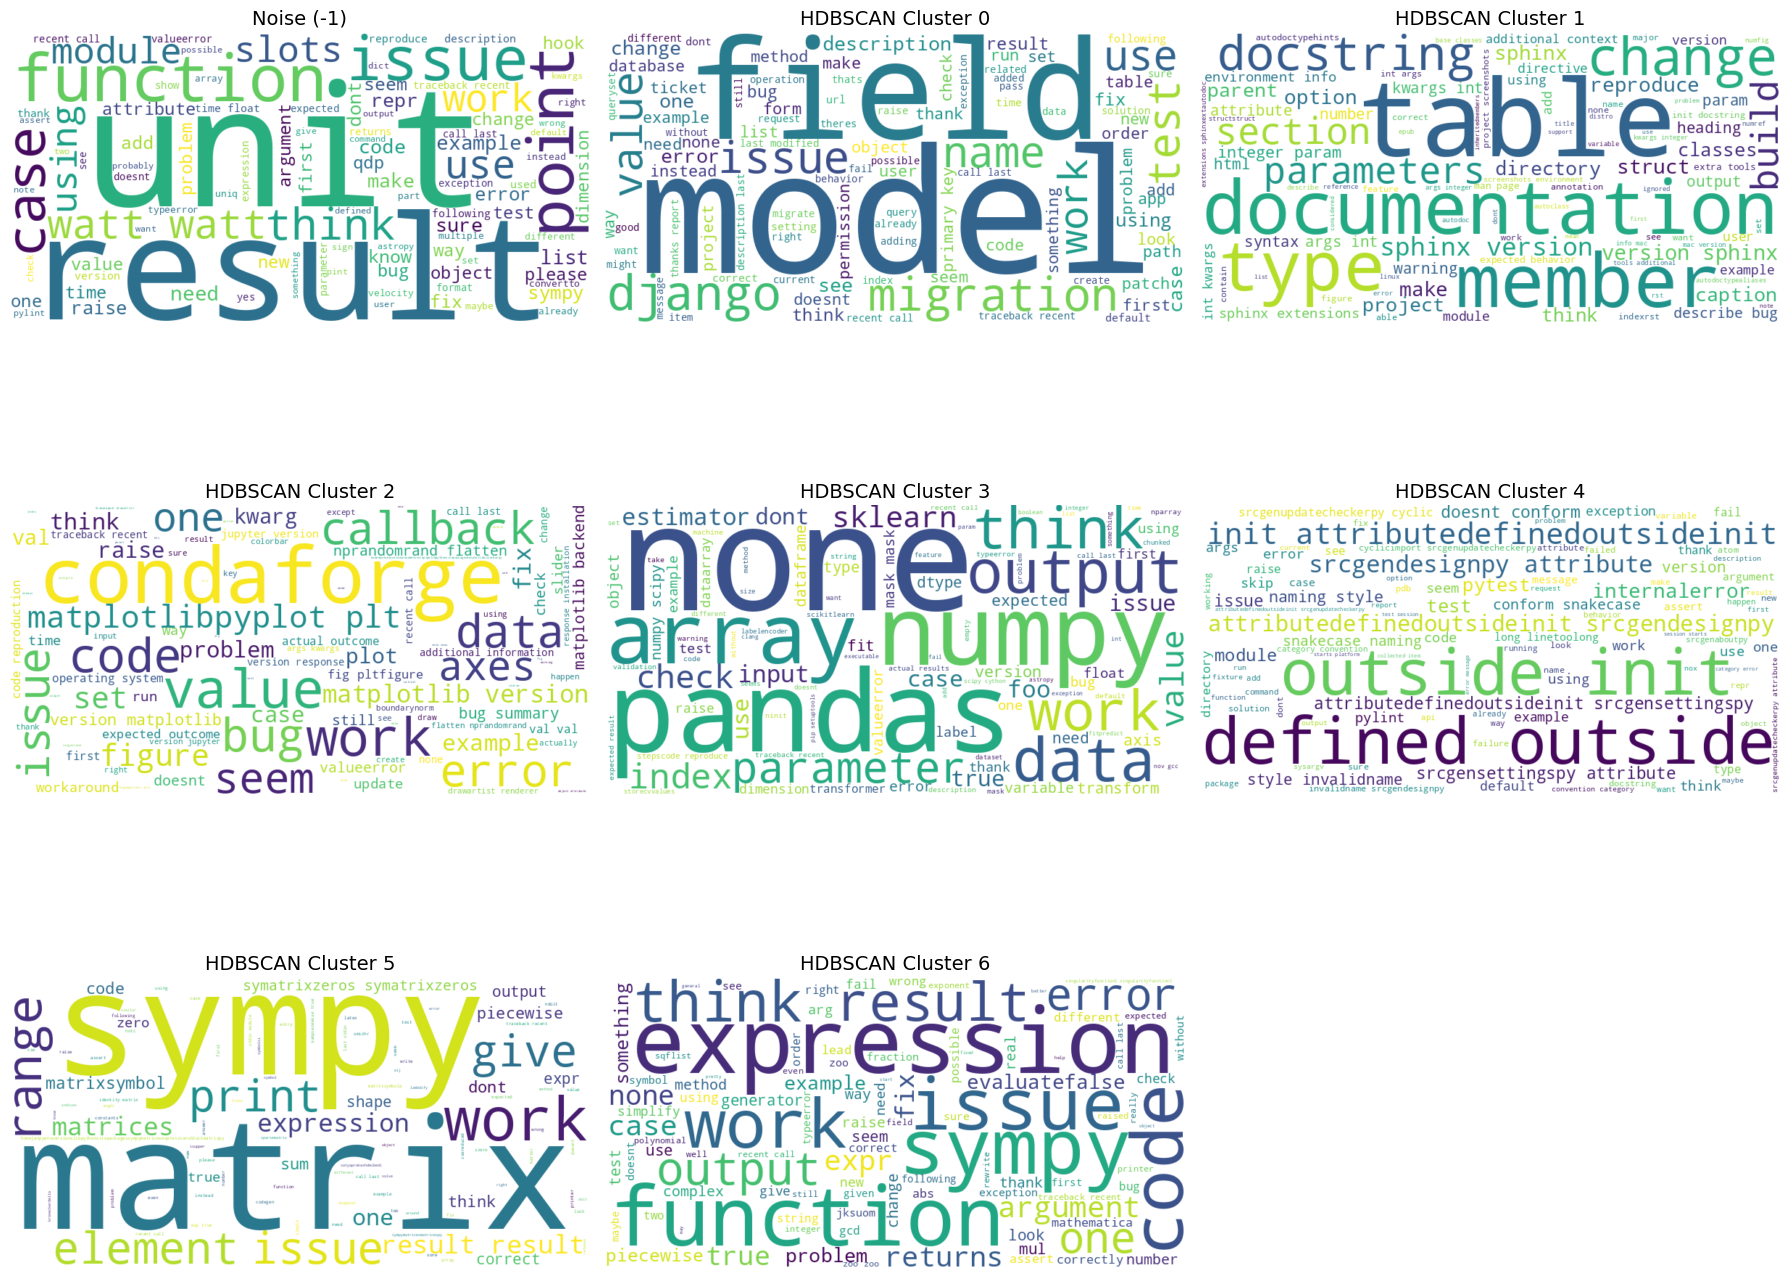

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
num_clusters = len(cluster_texts)
cols = 3
rows = (num_clusters + cols - 1) // cols

plt.figure(figsize=(18, 5 * rows))

for i, (cluster_id, text) in enumerate(cluster_texts.items()):
    wc = WordCloud(
        width=800,
        height=400,
        background_color='white',
        max_words=100
    ).generate(text)

    plt.subplot(rows, cols, i + 1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')

    title = "Noise (-1)" if cluster_id == -1 else f"HDBSCAN Cluster {cluster_id}"
    plt.title(title, fontsize=14)

plt.tight_layout()
plt.show()


#### Compute top TF–IDF terms per cluster

In [ ]:
cluster_docs = (
    df
    .groupby('hdbscan_topic')['clean_text']
    .apply(lambda x: ' '.join(x.dropna()))
)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

vectorizer = TfidfVectorizer(
    max_df=0.9,        # ignore overly common terms
    min_df=2,          # ignore very rare terms
    ngram_range=(1, 2) # unigrams + bigrams (very helpful)
)

tfidf_matrix = vectorizer.fit_transform(cluster_docs.values)
feature_names = vectorizer.get_feature_names_out()

top_k = 10  # number of terms per cluster
cluster_tfidf_terms = {}

for idx, cluster_id in enumerate(cluster_docs.index):
    row = tfidf_matrix[idx].toarray().flatten()
    top_indices = row.argsort()[::-1][:top_k]
    top_terms = [(feature_names[i], row[i]) for i in top_indices]
    cluster_tfidf_terms[cluster_id] = top_terms


for cluster_id, terms in cluster_tfidf_terms.items():
    title = "Noise (-1)" if cluster_id == -1 else f"Cluster {cluster_id}"
    print(f"\n{title}")
    print("-" * len(title))
    for term, score in terms:
        print(f"{term:<25} {score:.3f}")



Noise (-1)
----------
units                     0.374
float                     0.200
function                  0.191
repr                      0.168
point                     0.159
data                      0.150
unit                      0.120
sympy                     0.110
uniq                      0.105
dimension                 0.105

Cluster 0
---------
django                    0.354
model                     0.308
field                     0.215
models                    0.207
migration                 0.174
fields                    0.169
description               0.168
ticket                    0.128
key                       0.128
managepy                  0.125

Cluster 1
---------
sphinx                    0.450
int                       0.296
version                   0.209
docstring                 0.191
members                   0.190
integer                   0.178
args                      0.162
table                     0.161
classes                   0.153
section

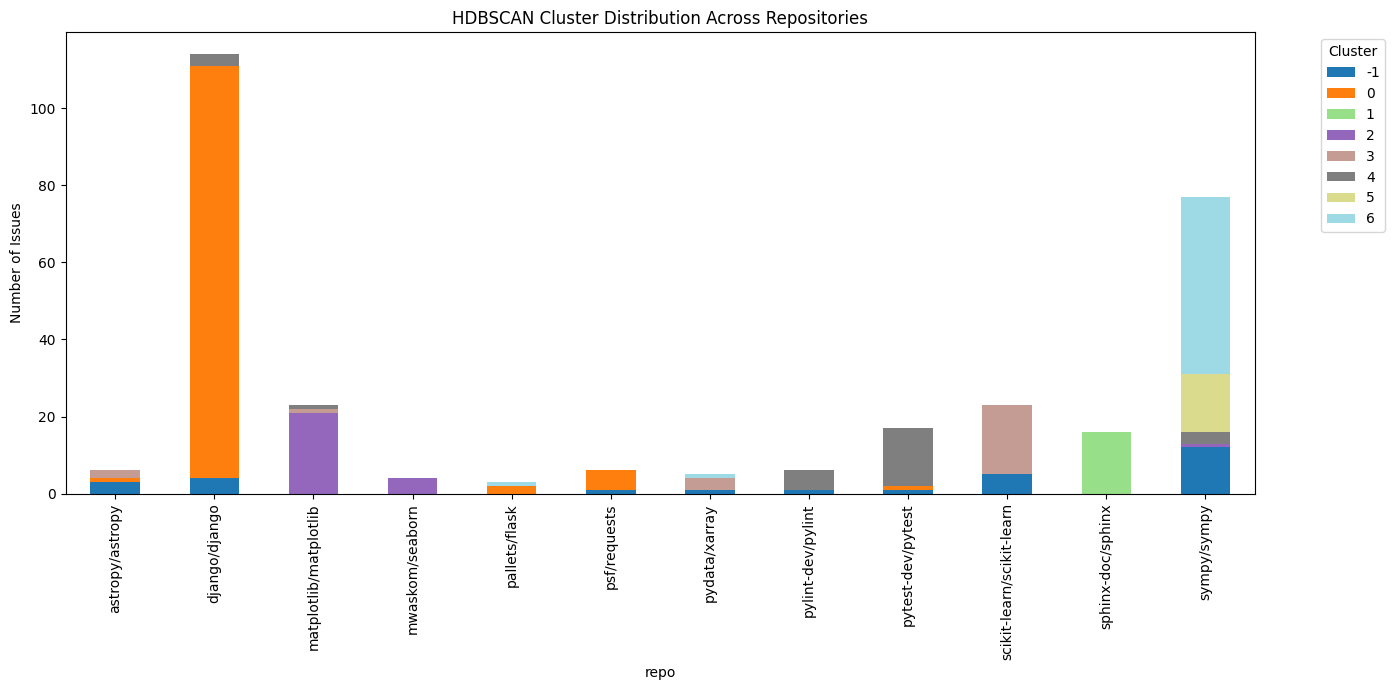

In [ ]:
import pandas as pd

cluster_repo_counts = df.groupby(['repo', 'hdbscan_topic']).size().unstack(fill_value=0)

cluster_repo_counts.plot(kind='bar', stacked=True, figsize=(14,7), colormap='tab20')
plt.ylabel("Number of Issues")
plt.title("HDBSCAN Cluster Distribution Across Repositories")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


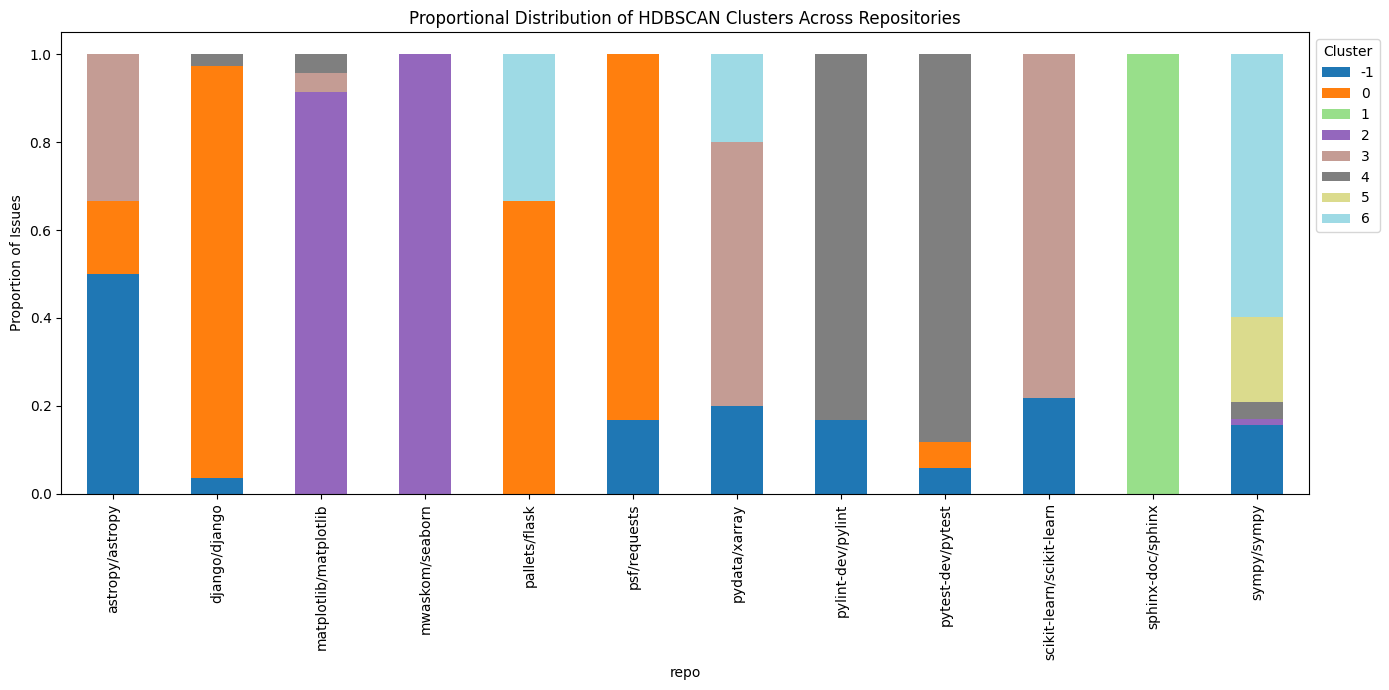

In [ ]:
# Compute proportions per repo
cluster_repo_props = cluster_repo_counts.div(cluster_repo_counts.sum(axis=1), axis=0)

# Plot stacked bar of proportions
cluster_repo_props.plot(kind='bar', stacked=True, figsize=(14,7), colormap='tab20')
plt.ylabel("Proportion of Issues")
plt.title("Proportional Distribution of HDBSCAN Clusters Across Repositories")
plt.legend(title="Cluster", bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(Save_path, "hdbscan_ps_cluster_repo_props.pdf"))
plt.show()


In [ ]:
df.to_csv(os.path.join(Save_path, "df_v9.csv"), index=False)

# Clustering

In [46]:
df = pd.read_csv("/Users/elmiraonagh/Desktop/courses/6444/project/SWE-manger/SWE-Manger/Project/RQ1/Datasets/df_v9.csv")
cols_to_remove = ['umap_2d_x', 'umap_2d_y', 'cluster_label', 'problem_statement', 'hints_text']
df = df.drop(columns=cols_to_remove)
df.head()

repo             instance_id  \
0  astropy/astropy  astropy__astropy-12907   
1  astropy/astropy  astropy__astropy-14182   
2  astropy/astropy  astropy__astropy-14365   
3  astropy/astropy  astropy__astropy-14995   
4  astropy/astropy   astropy__astropy-6938   

                                               patch  \
0  diff --git a/astropy/modeling/separable.py b/a...   
1  diff --git a/astropy/io/ascii/rst.py b/astropy...   
2  diff --git a/astropy/io/ascii/qdp.py b/astropy...   
3  diff --git a/astropy/nddata/mixins/ndarithmeti...   
4  diff --git a/astropy/io/fits/fitsrec.py b/astr...   

                                          test_patch  version  \
0  diff --git a/astropy/modeling/tests/test_separ...      4.3   
1  diff --git a/astropy/io/ascii/tests/test_rst.p...      5.1   
2  diff --git a/astropy/io/ascii/tests/test_qdp.p...      5.1   
3  diff --git a/astropy/nddata/mixins/tests/test_...      5.2   
4  diff --git a/astropy/io/fits/tests/test_checks...      1.3   

   n_files_touched  patch_size  n_test_files_touched  test_patch_size  \
0                1           2                     1               19   
1                1          41                     1               28   
2                1           4                     1               15   
3                1           4                     1               39   
4                1           2                     2               17   

   num_FAIL_TO_PASS  num_PASS_TO_PASS  has_hint  hint_length  \
0                 2                13     False            0   
1                 1                 9     False            0   
2                 1                 8      True          206   
3                 1               179      True          808   
4                 2                11      True           55   

   problem_length_words predicted_GH_labels  dominant_topic  \
0                   158                 bug               8   
1                   189         enhancement               6   
2                   202                 bug              12   
3                   357                 bug               6   
4                    76                 bug               4   

                                          clean_text  hdbscan_topic  
0  modelings separabilitymatrix compute separabil...              0  
1  please support header rows restructuredtext ou...             -1  
2  asciiqdp table format assumes qdp commands upp...             -1  
3  nddataref mask propagation fails one operand m...              3  
4  possible bug iofits related exponents came acr...             -1

In [47]:
import numpy as np
import pandas as pd

# Columns used for clustering
NUMERIC_COLS = [
    "n_files_touched",
    "patch_size",
    "n_test_files_touched",
    "test_patch_size",
    "num_FAIL_TO_PASS",
    "num_PASS_TO_PASS",
    "has_hint",
    "hint_length",
    "problem_length_words",
]

TEXT_COL = "clean_text"
df["has_hint"] = df["has_hint"].astype(int)


## correlation

In [ ]:
corelation_data = df[NUMERIC_COLS].fillna(0)

In [ ]:
corr = corelation_data.corr(method="pearson")
corr


n_files_touched  patch_size  n_test_files_touched  \
n_files_touched                   NaN         NaN                   NaN   
patch_size                        NaN    1.000000              0.130382   
n_test_files_touched              NaN    0.130382              1.000000   
test_patch_size                   NaN    0.397118              0.308110   
num_FAIL_TO_PASS                  NaN   -0.004359              0.052891   
num_PASS_TO_PASS                  NaN   -0.023427              0.155233   
has_hint                          NaN   -0.090317             -0.011119   
hint_length                       NaN    0.144806              0.068894   
problem_length_words              NaN   -0.045371              0.029061   

                      test_patch_size  num_FAIL_TO_PASS  num_PASS_TO_PASS  \
n_files_touched                   NaN               NaN               NaN   
patch_size                   0.397118         -0.004359         -0.023427   
n_test_files_touched         0.308110          0.052891          0.155233   
test_patch_size              1.000000          0.027120         -0.032628   
num_FAIL_TO_PASS             0.027120          1.000000         -0.040960   
num_PASS_TO_PASS            -0.032628         -0.040960          1.000000   
has_hint                    -0.035754         -0.008824          0.058817   
hint_length                  0.086567         -0.013866          0.099131   
problem_length_words        -0.008352          0.114153          0.070777   

                      has_hint  hint_length  problem_length_words  
n_files_touched            NaN          NaN                   NaN  
patch_size           -0.090317     0.144806             -0.045371  
n_test_files_touched -0.011119     0.068894              0.029061  
test_patch_size      -0.035754     0.086567             -0.008352  
num_FAIL_TO_PASS     -0.008824    -0.013866              0.114153  
num_PASS_TO_PASS      0.058817     0.099131              0.070777  
has_hint              1.000000     0.357073              0.102155  
hint_length           0.357073     1.000000              0.163171  
problem_length_words  0.102155     0.163171              1.000000

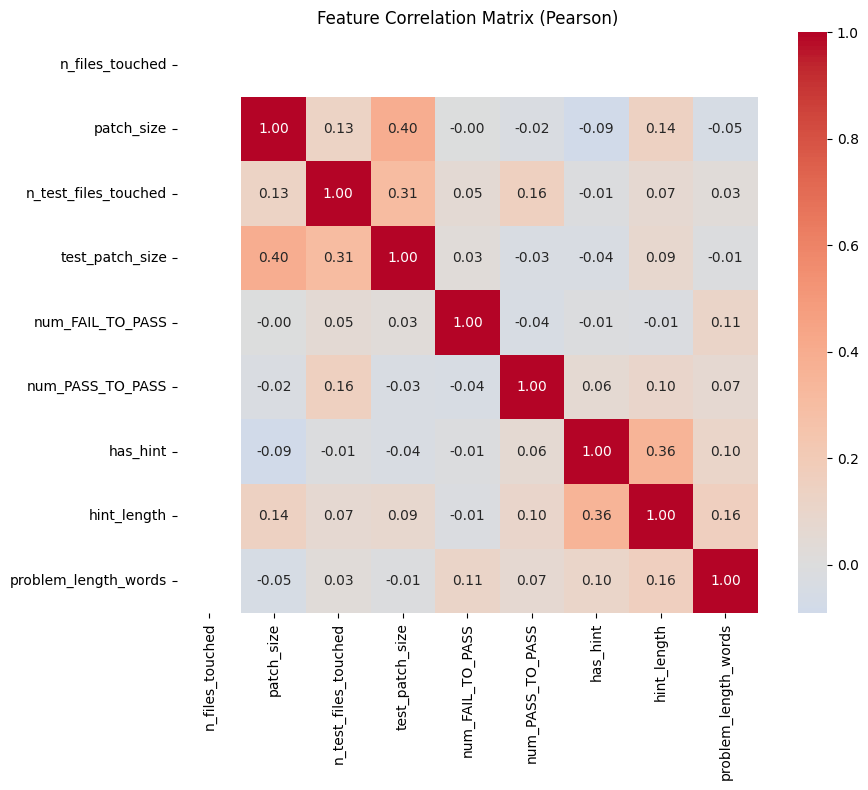

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True
)
plt.title("Feature Correlation Matrix (Pearson)")
plt.tight_layout()
plt.show()


## clean and embed

In [48]:
### scale numeric features
from sklearn.preprocessing import StandardScaler

X_num = df[NUMERIC_COLS].fillna(0)
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)


In [49]:
#### embed problem statement + hint text

from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer("all-MiniLM-L6-v2")
X_text = embedder.encode(
    df[TEXT_COL].tolist(),
    batch_size=64,
    show_progress_bar=True
)


Batches: 100%|██████████| 5/5 [00:01<00:00,  4.80it/s]


In [50]:
####Text should dominate semantics; structure refines clusters.
##### so we assign weights to the features
TEXT_WEIGHT = 1.0
NUM_WEIGHT = 0.5   # structural signal, not dominant

X = np.hstack([
    TEXT_WEIGHT * X_text,
    NUM_WEIGHT * X_num_scaled
])


## reduce dimension to

In [51]:
import umap
import hdbscan
import numpy as np

# Dimensions to try
dims_to_test = [5, 10, 15, 20, 25]
results = []
for n_dim in dims_to_test:
    # Reduce embeddings to n_dim dimensions
    umap_model = umap.UMAP(n_neighbors=15, n_components=n_dim, metric='cosine', random_state=42)
    reduced = umap_model.fit_transform(X)

    # Cluster with HDBSCAN
    clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=5, metric='euclidean', cluster_selection_method='eom')
    labels = clusterer.fit_predict(reduced)

    # Compute metrics
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    noise_fraction = np.sum(labels == -1) / len(labels)

    results.append((n_dim, n_clusters, noise_fraction))

# Convert to DataFrame for easy inspection
import pandas as pd
results_df = pd.DataFrame(results, columns=['n_dimensions', 'n_clusters', 'noise_fraction'])
print(results_df)


/Users/elmiraonagh/Desktop/courses/6444/project/SWE-manger/SWE-Manger/venv/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/elmiraonagh/Desktop/courses/6444/project/SWE-manger/SWE-Manger/venv/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/elmiraonagh/Desktop/courses/6444/project/SWE-manger/SWE-Manger/venv/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/elmiraonagh/Desktop/courses/6444/project/SWE-manger/SWE-Manger/venv/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/elmiraonagh/Desktop/courses/6444/project/SWE-manger/SWE-Manger/venv/lib/pytho

   n_dimensions  n_clusters  noise_fraction
0             5           5        0.080000
1            10           5        0.023333
2            15           8        0.076667
3            20           6        0.060000
4            25           3        0.000000


10 is good, more reduces noise to 0 but not like its a big difference

In [52]:
print("Original embedding shape:", X.shape)

Original embedding shape: (300, 393)


In [39]:
import umap

# Reduce embeddings to 15
umap_model = umap.UMAP(n_neighbors=15, n_components=10, metric='cosine', random_state=42)
reduced = umap_model.fit_transform(X)

print(reduced.shape)


/Users/elmiraonagh/Desktop/courses/6444/project/SWE-manger/SWE-Manger/venv/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


(300, 10)


In [40]:
import joblib

# Save the model
joblib.dump(umap_model, "/Users/elmiraonagh/Desktop/courses/6444/project/SWE-manger/SWE-Manger/SWE-Manager/assets/umap_model.pkl")

# Later, you can load it like this
# loaded_umap = joblib.load("umap_model.pkl")


['/Users/elmiraonagh/Desktop/courses/6444/project/SWE-manger/SWE-Manger/SWE-Manager/assets/umap_model.pkl']

## hdbscan clustering

In [61]:
import hdbscan

# Initialize HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=10,  # minimum size of cluster
                            min_samples=5,       # sensitivity
                            metric='euclidean',
                            cluster_selection_method='eom',
                            prediction_data=True)

# Fit HDBSCAN
cluster_labels = clusterer.fit(reduced)

# Assign to DataFrame
df['hdbscan_topic_all'] = cluster_labels

# Check cluster counts
print(df['hdbscan_topic_all'].value_counts())


hdbscan_topic_all
HDBSCAN(min_cluster_size=10, min_samples=5, prediction_data=True)    300
Name: count, dtype: int64


In [62]:
df.head()

repo             instance_id  \
0  astropy/astropy  astropy__astropy-12907   
1  astropy/astropy  astropy__astropy-14182   
2  astropy/astropy  astropy__astropy-14365   
3  astropy/astropy  astropy__astropy-14995   
4  astropy/astropy   astropy__astropy-6938   

                                               patch  \
0  diff --git a/astropy/modeling/separable.py b/a...   
1  diff --git a/astropy/io/ascii/rst.py b/astropy...   
2  diff --git a/astropy/io/ascii/qdp.py b/astropy...   
3  diff --git a/astropy/nddata/mixins/ndarithmeti...   
4  diff --git a/astropy/io/fits/fitsrec.py b/astr...   

                                          test_patch  version  \
0  diff --git a/astropy/modeling/tests/test_separ...      4.3   
1  diff --git a/astropy/io/ascii/tests/test_rst.p...      5.1   
2  diff --git a/astropy/io/ascii/tests/test_qdp.p...      5.1   
3  diff --git a/astropy/nddata/mixins/tests/test_...      5.2   
4  diff --git a/astropy/io/fits/tests/test_checks...      1.3   

   n_files_touched  patch_size  n_test_files_touched  test_patch_size  \
0                1           2                     1               19   
1                1          41                     1               28   
2                1           4                     1               15   
3                1           4                     1               39   
4                1           2                     2               17   

   num_FAIL_TO_PASS  num_PASS_TO_PASS  has_hint  hint_length  \
0                 2                13         0            0   
1                 1                 9         0            0   
2                 1                 8         1          206   
3                 1               179         1          808   
4                 2                11         1           55   

   problem_length_words predicted_GH_labels  dominant_topic  \
0                   158                 bug               8   
1                   189         enhancement               6   
2                   202                 bug              12   
3                   357                 bug               6   
4                    76                 bug               4   

                                          clean_text  hdbscan_topic  \
0  modelings separabilitymatrix compute separabil...              0   
1  please support header rows restructuredtext ou...             -1   
2  asciiqdp table format assumes qdp commands upp...             -1   
3  nddataref mask propagation fails one operand m...              3   
4  possible bug iofits related exponents came acr...             -1   

                                   hdbscan_topic_all  
0  HDBSCAN(min_cluster_size=10, min_samples=5, pr...  
1  HDBSCAN(min_cluster_size=10, min_samples=5, pr...  
2  HDBSCAN(min_cluster_size=10, min_samples=5, pr...  
3  HDBSCAN(min_cluster_size=10, min_samples=5, pr...  
4  HDBSCAN(min_cluster_size=10, min_samples=5, pr...

In [63]:
import pickle

# Save HDBSCAN model
with open("/Users/elmiraonagh/Desktop/courses/6444/project/SWE-manger/SWE-Manger/SWE-Manager/assets/hdbscan_model_all.pkl", "wb") as f:
    pickle.dump(clusterer, f)


### analysis

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


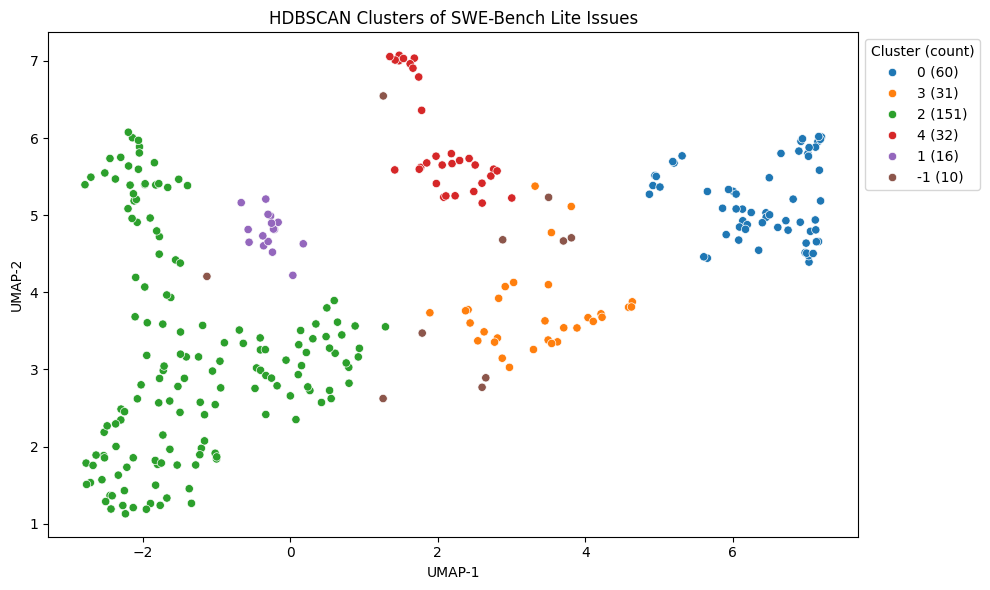

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Reduce to 2D for plotting
umap_2d = umap.UMAP(n_neighbors=15, n_components=2, metric='cosine', random_state=42)
reduced_2d = umap_2d.fit_transform(X)

# Add 2D coordinates to DataFrame
df['umap_2d_x'] = reduced_2d[:,0]
df['umap_2d_y'] = reduced_2d[:,1]

# Compute cluster counts for legend
cluster_counts = df['hdbscan_topic_all'].value_counts().sort_index()
cluster_labels = [f"{c} ({cluster_counts[c]})" for c in cluster_counts.index]

# Map cluster values to labels
label_map = dict(zip(cluster_counts.index, cluster_labels))
df['cluster_label_all'] = df['hdbscan_topic_all'].map(label_map)

plt.figure(figsize=(10,6))
sns.scatterplot(x='umap_2d_x', y='umap_2d_y', hue='cluster_label_all', data=df, palette='tab10', legend='full')

plt.title("HDBSCAN Clusters of SWE-Bench Lite Issues")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.legend(title="Cluster (count)", bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(Save_path, "HDBSCAN_clusters_all.pdf"))
plt.show()


In [ ]:
df.to_csv(os.path.join(Save_path, "df_v10.csv"), index=False)

<Axes: ylabel='$\\lambda$ value'>

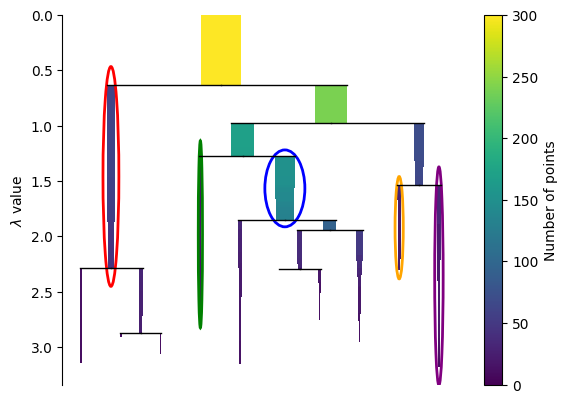

In [ ]:
colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta']
clusterer.condensed_tree_.plot(
    select_clusters=True,
    selection_palette=colors,
    colorbar=True
)


In [ ]:
import numpy as np
import pandas as pd

cluster_ids = sorted([c for c in df['hdbscan_topic_all'].unique() if c != -1])

cluster_centroids = []
cluster_labels = []

for cid in cluster_ids:
    points = reduced[df['hdbscan_topic_all'] == cid]
    centroid = points.mean(axis=0)
    cluster_centroids.append(centroid)
    cluster_labels.append(f"Cluster {cid}")

cluster_centroids = np.vstack(cluster_centroids)


In [ ]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
# Pairwise distances between cluster centroids
distance_matrix = pdist(cluster_centroids, metric='euclidean')

# Hierarchical linkage
Z = linkage(distance_matrix, method='ward')


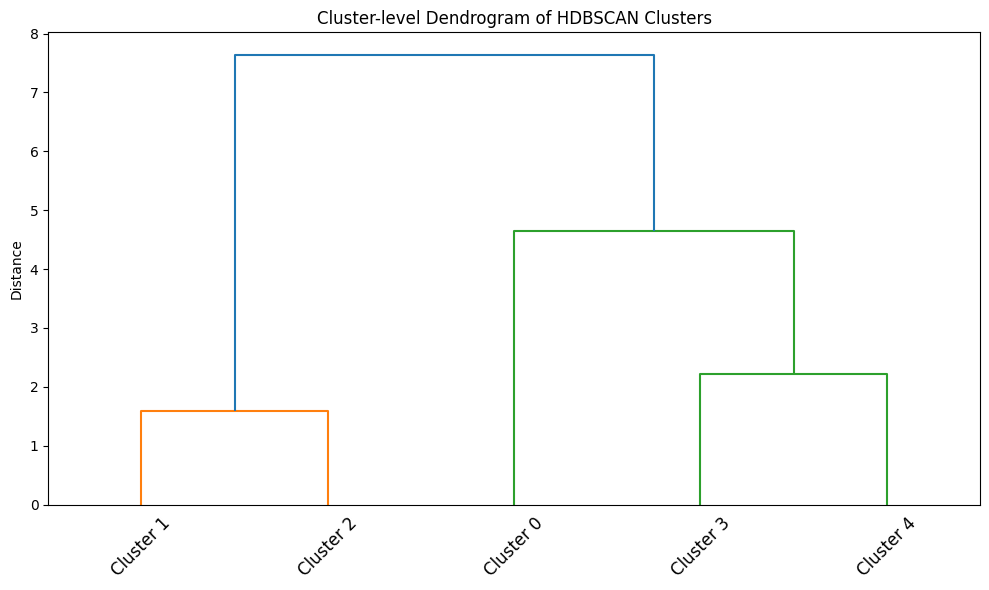

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(10, 6))
dendrogram(
    Z,
    labels=cluster_labels,
    leaf_rotation=45,
    leaf_font_size=12
)

plt.title("Cluster-level Dendrogram of HDBSCAN Clusters")
plt.ylabel("Distance")
plt.tight_layout()
plt.savefig(os.path.join(Save_path, "cluster_level_all_dendrogram.pdf"))
plt.show()


In [ ]:
df.head()

repo             instance_id  \
0  astropy/astropy  astropy__astropy-12907   
1  astropy/astropy  astropy__astropy-14182   
2  astropy/astropy  astropy__astropy-14365   
3  astropy/astropy  astropy__astropy-14995   
4  astropy/astropy   astropy__astropy-6938   

                                               patch  \
0  diff --git a/astropy/modeling/separable.py b/a...   
1  diff --git a/astropy/io/ascii/rst.py b/astropy...   
2  diff --git a/astropy/io/ascii/qdp.py b/astropy...   
3  diff --git a/astropy/nddata/mixins/ndarithmeti...   
4  diff --git a/astropy/io/fits/fitsrec.py b/astr...   

                                          test_patch  version  \
0  diff --git a/astropy/modeling/tests/test_separ...      4.3   
1  diff --git a/astropy/io/ascii/tests/test_rst.p...      5.1   
2  diff --git a/astropy/io/ascii/tests/test_qdp.p...      5.1   
3  diff --git a/astropy/nddata/mixins/tests/test_...      5.2   
4  diff --git a/astropy/io/fits/tests/test_checks...      1.3   

   n_files_touched  patch_size  n_test_files_touched  test_patch_size  \
0                1           2                     1               19   
1                1          41                     1               28   
2                1           4                     1               15   
3                1           4                     1               39   
4                1           2                     2               17   

   num_FAIL_TO_PASS  ...  hint_length  problem_length_words  \
0                 2  ...            0                   158   
1                 1  ...            0                   189   
2                 1  ...          206                   202   
3                 1  ...          808                   357   
4                 2  ...           55                    76   

   predicted_GH_labels  dominant_topic  \
0                  bug               8   
1          enhancement               6   
2                  bug              12   
3                  bug               6   
4                  bug               4   

                                          clean_text  hdbscan_topic  \
0  modelings separabilitymatrix compute separabil...              0   
1  please support header rows restructuredtext ou...             -1   
2  asciiqdp table format assumes qdp commands upp...             -1   
3  nddataref mask propagation fails one operand m...              3   
4  possible bug iofits related exponents came acr...             -1   

  hdbscan_topic_all  umap_2d_x  umap_2d_y  cluster_label_all  
0                 0   7.033974   4.392463             0 (60)  
1                 3   4.213261   3.721633             3 (31)  
2                 2  -1.724892   2.986987            2 (151)  
3                 2  -1.514751   5.466134            2 (151)  
4                 4   2.487444   5.307540             4 (32)  

[5 rows x 22 columns]

In [ ]:
import pandas as pd

ct = pd.crosstab(
    df["hdbscan_topic"],        # problem statement only
    df["hdbscan_topic_all"]     # all features
)


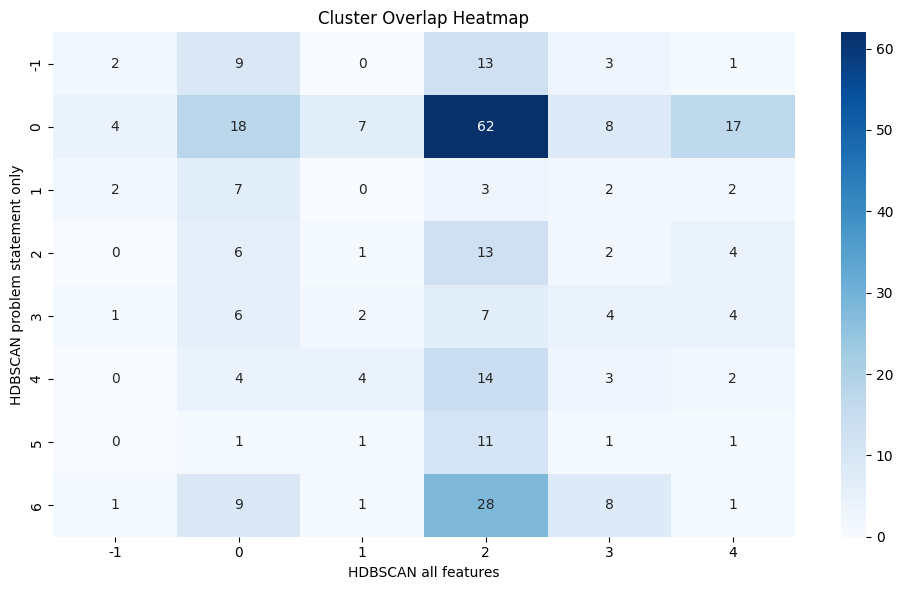

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(ct, annot=True, fmt="d", cmap="Blues")
plt.xlabel("HDBSCAN all features")
plt.ylabel("HDBSCAN problem statement only")
plt.title("Cluster Overlap Heatmap")
plt.tight_layout()
plt.savefig(os.path.join(Save_path, "all_cluster_overlap_heatmap.pdf"))
plt.show()


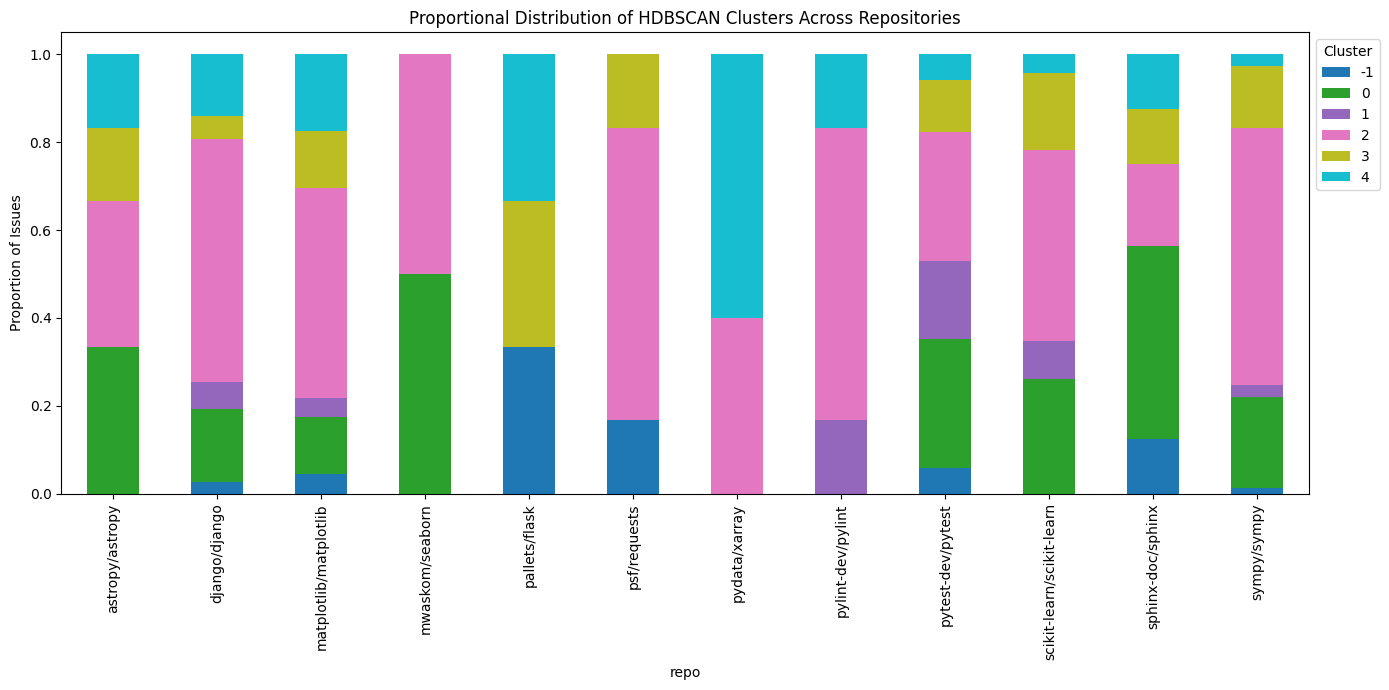

In [ ]:
# Compute proportions per repo
cluster_repo_counts = df.groupby(['repo', 'hdbscan_topic_all']).size().unstack(fill_value=0)
cluster_repo_props = cluster_repo_counts.div(cluster_repo_counts.sum(axis=1), axis=0)

# Plot stacked bar of proportions
cluster_repo_props.plot(kind='bar', stacked=True, figsize=(14,7), colormap='tab10')
plt.ylabel("Proportion of Issues")
plt.title("Proportional Distribution of HDBSCAN Clusters Across Repositories")
plt.legend(title="Cluster", bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(Save_path, "hdbscan_all_cluster_repo_props.pdf"))
plt.show()


#### TF-IDF

In [ ]:
cluster_docs = (
    df
    .groupby('hdbscan_topic_all')['clean_text']
    .apply(lambda x: ' '.join(x.dropna()))
)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

vectorizer = TfidfVectorizer(
    max_df=0.9,        # ignore overly common terms
    min_df=2,          # ignore very rare terms
    ngram_range=(1, 2) # unigrams + bigrams (very helpful)
)

tfidf_matrix = vectorizer.fit_transform(cluster_docs.values)
feature_names = vectorizer.get_feature_names_out()

top_k = 10  # number of terms per cluster
cluster_tfidf_terms = {}

for idx, cluster_id in enumerate(cluster_docs.index):
    row = tfidf_matrix[idx].toarray().flatten()
    top_indices = row.argsort()[::-1][:top_k]
    top_terms = [(feature_names[i], row[i]) for i in top_indices]
    cluster_tfidf_terms[cluster_id] = top_terms


for cluster_id, terms in cluster_tfidf_terms.items():
    title = "Noise (-1)" if cluster_id == -1 else f"Cluster {cluster_id}"
    print(f"\n{title}")
    print("-" * len(title))
    for term, score in terms:
        print(f"{term:<25} {score:.3f}")



Noise (-1)
----------
classes                   0.340
uniq                      0.206
list                      0.184
base                      0.174
email                     0.174
conversion                0.149
multiple                  0.149
autoclass                 0.147
parent                    0.147
warnings                  0.129

Cluster 0
---------
args                      0.147
empty                     0.139
false false               0.136
sympy                     0.131
valueerror                0.131
expr                      0.125
mathematica               0.123
results                   0.123
drawartist renderer       0.111
drawwrapper               0.111

Cluster 1
---------
condaforge                0.610
init                      0.365
outside                   0.359
defined                   0.323
conform                   0.142
naming                    0.125
primary                   0.097
style                     0.091
primary key               0.088
expr   

In [ ]:
df.to_csv(os.path.join(Save_path, "df_v11.csv"), index=False)

# clustering with complexity score

In [ ]:
df = pd.read_csv(os.path.join(Save_path, "df_v11.csv"))
cols_to_remove = ['umap_2d_x', 'umap_2d_y', 'cluster_label_all']
df = df.drop(columns=cols_to_remove)
df.head()

repo             instance_id  \
0  astropy/astropy  astropy__astropy-12907   
1  astropy/astropy  astropy__astropy-14182   
2  astropy/astropy  astropy__astropy-14365   
3  astropy/astropy  astropy__astropy-14995   
4  astropy/astropy   astropy__astropy-6938   

                                               patch  \
0  diff --git a/astropy/modeling/separable.py b/a...   
1  diff --git a/astropy/io/ascii/rst.py b/astropy...   
2  diff --git a/astropy/io/ascii/qdp.py b/astropy...   
3  diff --git a/astropy/nddata/mixins/ndarithmeti...   
4  diff --git a/astropy/io/fits/fitsrec.py b/astr...   

                                          test_patch  version  \
0  diff --git a/astropy/modeling/tests/test_separ...      4.3   
1  diff --git a/astropy/io/ascii/tests/test_rst.p...      5.1   
2  diff --git a/astropy/io/ascii/tests/test_qdp.p...      5.1   
3  diff --git a/astropy/nddata/mixins/tests/test_...      5.2   
4  diff --git a/astropy/io/fits/tests/test_checks...      1.3   

   n_files_touched  patch_size  n_test_files_touched  test_patch_size  \
0                1           2                     1               19   
1                1          41                     1               28   
2                1           4                     1               15   
3                1           4                     1               39   
4                1           2                     2               17   

   num_FAIL_TO_PASS  num_PASS_TO_PASS  has_hint  hint_length  \
0                 2                13         0            0   
1                 1                 9         0            0   
2                 1                 8         1          206   
3                 1               179         1          808   
4                 2                11         1           55   

   problem_length_words predicted_GH_labels  dominant_topic  \
0                   158                 bug               8   
1                   189         enhancement               6   
2                   202                 bug              12   
3                   357                 bug               6   
4                    76                 bug               4   

                                          clean_text  hdbscan_topic  \
0  modelings separabilitymatrix compute separabil...              0   
1  please support header rows restructuredtext ou...             -1   
2  asciiqdp table format assumes qdp commands upp...             -1   
3  nddataref mask propagation fails one operand m...              3   
4  possible bug iofits related exponents came acr...             -1   

   hdbscan_topic_all  
0                  0  
1                  3  
2                  2  
3                  2  
4                  4

## complexity score

| Feature                | Rationale                                                            | Reference / Precedent                             |
| ---------------------- | -------------------------------------------------------------------- | ------------------------------------------------- |
| `patch_size`           | Larger code changes are generally harder to implement and test       | Mockus et al., ICSE 2000; Zimmermann et al., 2007 |
| `n_files_touched`      | Multi-file changes are more complex to coordinate                    | Hindle et al., MSR 2012                           |
| `test_patch_size`      | Large changes in tests indicate harder validation                    | Kim et al., FSE 2013                              |
| `n_test_files_touched` | Spread across tests → higher cognitive load                          | Mockus et al., ICSE 2000                          |
| `num_FAIL_TO_PASS`     | Number of failing → passing transitions proxies difficulty of repair | SWE-Bench analysis approach                       |
| `problem_length_words` | Longer problem statements → more complex reasoning required          | Palomba et al., TSE 2019                          |


In [ ]:
#### Normalization and transformation
import numpy as np

df["log_patch_size"] = np.log1p(df["patch_size"])
df["log_n_files_touched"] = np.log1p(df["n_files_touched"])
df["log_test_patch_size"] = np.log1p(df["test_patch_size"])
df["log_n_test_files_touched"] = np.log1p(df["n_test_files_touched"])

df.head()


repo             instance_id  \
0  astropy/astropy  astropy__astropy-12907   
1  astropy/astropy  astropy__astropy-14182   
2  astropy/astropy  astropy__astropy-14365   
3  astropy/astropy  astropy__astropy-14995   
4  astropy/astropy   astropy__astropy-6938   

                                               patch  \
0  diff --git a/astropy/modeling/separable.py b/a...   
1  diff --git a/astropy/io/ascii/rst.py b/astropy...   
2  diff --git a/astropy/io/ascii/qdp.py b/astropy...   
3  diff --git a/astropy/nddata/mixins/ndarithmeti...   
4  diff --git a/astropy/io/fits/fitsrec.py b/astr...   

                                          test_patch  version  \
0  diff --git a/astropy/modeling/tests/test_separ...      4.3   
1  diff --git a/astropy/io/ascii/tests/test_rst.p...      5.1   
2  diff --git a/astropy/io/ascii/tests/test_qdp.p...      5.1   
3  diff --git a/astropy/nddata/mixins/tests/test_...      5.2   
4  diff --git a/astropy/io/fits/tests/test_checks...      1.3   

   n_files_touched  patch_size  n_test_files_touched  test_patch_size  \
0                1           2                     1               19   
1                1          41                     1               28   
2                1           4                     1               15   
3                1           4                     1               39   
4                1           2                     2               17   

   num_FAIL_TO_PASS  ...  problem_length_words  predicted_GH_labels  \
0                 2  ...                   158                  bug   
1                 1  ...                   189          enhancement   
2                 1  ...                   202                  bug   
3                 1  ...                   357                  bug   
4                 2  ...                    76                  bug   

   dominant_topic                                         clean_text  \
0               8  modelings separabilitymatrix compute separabil...   
1               6  please support header rows restructuredtext ou...   
2              12  asciiqdp table format assumes qdp commands upp...   
3               6  nddataref mask propagation fails one operand m...   
4               4  possible bug iofits related exponents came acr...   

  hdbscan_topic  hdbscan_topic_all log_patch_size  log_n_files_touched  \
0             0                  0       1.098612             0.693147   
1            -1                  3       3.737670             0.693147   
2            -1                  2       1.609438             0.693147   
3             3                  2       1.609438             0.693147   
4            -1                  4       1.098612             0.693147   

   log_test_patch_size  log_n_test_files_touched  
0             2.995732                  0.693147  
1             3.367296                  0.693147  
2             2.772589                  0.693147  
3             3.688879                  0.693147  
4             2.890372                  1.098612  

[5 rows x 23 columns]

In [ ]:
#### Standardize
from sklearn.preprocessing import StandardScaler

complexity_features = [
    "log_patch_size",
    "log_n_files_touched",
    "log_test_patch_size",
    "log_n_test_files_touched",
    "num_FAIL_TO_PASS",
    "problem_length_words"
]

scaler = StandardScaler()
X_complexity = scaler.fit_transform(df[complexity_features])


| Feature              | Weight rationale                                         |
| -------------------- | -------------------------------------------------------- |
| patch_size           | 1.0 → core size of change                                |
| n_files_touched      | 1.0 → multi-file coordination                            |
| test_patch_size      | 0.7 → test complexity is slightly secondary              |
| n_test_files_touched | 0.7 → test spread contributes but less than code         |
| num_FAIL_TO_PASS     | 1.2 → empirically, failed tests indicate more difficulty |
| problem_length_words | 0.5 → cognitive load, moderate weight                    |


In [ ]:
# patch_size, n_files_touched: 1.0
# test_patch_size, n_test_files_touched: 0.7
# num_FAIL_TO_PASS: 1.2
# problem_length_words: 0.5
weights = np.array([1.0, 1.0, 0.7, 0.7, 1.2, 0.5])

In [ ]:
weighted_sum = (X_complexity * weights).sum(axis=1)
min_val = weighted_sum.min()
max_val = weighted_sum.max()
df["complexity_score"] = (weighted_sum - min_val) / (max_val - min_val)
df.head()

repo             instance_id  \
0  astropy/astropy  astropy__astropy-12907   
1  astropy/astropy  astropy__astropy-14182   
2  astropy/astropy  astropy__astropy-14365   
3  astropy/astropy  astropy__astropy-14995   
4  astropy/astropy   astropy__astropy-6938   

                                               patch  \
0  diff --git a/astropy/modeling/separable.py b/a...   
1  diff --git a/astropy/io/ascii/rst.py b/astropy...   
2  diff --git a/astropy/io/ascii/qdp.py b/astropy...   
3  diff --git a/astropy/nddata/mixins/ndarithmeti...   
4  diff --git a/astropy/io/fits/fitsrec.py b/astr...   

                                          test_patch  version  \
0  diff --git a/astropy/modeling/tests/test_separ...      4.3   
1  diff --git a/astropy/io/ascii/tests/test_rst.p...      5.1   
2  diff --git a/astropy/io/ascii/tests/test_qdp.p...      5.1   
3  diff --git a/astropy/nddata/mixins/tests/test_...      5.2   
4  diff --git a/astropy/io/fits/tests/test_checks...      1.3   

   n_files_touched  patch_size  n_test_files_touched  test_patch_size  \
0                1           2                     1               19   
1                1          41                     1               28   
2                1           4                     1               15   
3                1           4                     1               39   
4                1           2                     2               17   

   num_FAIL_TO_PASS  ...  predicted_GH_labels  dominant_topic  \
0                 2  ...                  bug               8   
1                 1  ...          enhancement               6   
2                 1  ...                  bug              12   
3                 1  ...                  bug               6   
4                 2  ...                  bug               4   

                                          clean_text  hdbscan_topic  \
0  modelings separabilitymatrix compute separabil...              0   
1  please support header rows restructuredtext ou...             -1   
2  asciiqdp table format assumes qdp commands upp...             -1   
3  nddataref mask propagation fails one operand m...              3   
4  possible bug iofits related exponents came acr...             -1   

  hdbscan_topic_all  log_patch_size log_n_files_touched  log_test_patch_size  \
0                 0        1.098612            0.693147             2.995732   
1                 3        3.737670            0.693147             3.367296   
2                 2        1.609438            0.693147             2.772589   
3                 2        1.609438            0.693147             3.688879   
4                 4        1.098612            0.693147             2.890372   

   log_n_test_files_touched  complexity_score  
0                  0.693147          0.107951  
1                  0.693147          0.264744  
2                  0.693147          0.131466  
3                  0.693147          0.183055  
4                  1.098612          0.151291  

[5 rows x 24 columns]

In [ ]:
cols_to_remove = ["log_patch_size", "log_n_files_touched", "log_test_patch_size",
    "log_n_test_files_touched", "num_FAIL_TO_PASS", "problem_length_words", "patch_size",
    "n_files_touched", "test_patch_size", "n_test_files_touched"]
df = df.drop(columns=cols_to_remove)
df.head()

repo             instance_id  \
0  astropy/astropy  astropy__astropy-12907   
1  astropy/astropy  astropy__astropy-14182   
2  astropy/astropy  astropy__astropy-14365   
3  astropy/astropy  astropy__astropy-14995   
4  astropy/astropy   astropy__astropy-6938   

                                               patch  \
0  diff --git a/astropy/modeling/separable.py b/a...   
1  diff --git a/astropy/io/ascii/rst.py b/astropy...   
2  diff --git a/astropy/io/ascii/qdp.py b/astropy...   
3  diff --git a/astropy/nddata/mixins/ndarithmeti...   
4  diff --git a/astropy/io/fits/fitsrec.py b/astr...   

                                          test_patch  version  \
0  diff --git a/astropy/modeling/tests/test_separ...      4.3   
1  diff --git a/astropy/io/ascii/tests/test_rst.p...      5.1   
2  diff --git a/astropy/io/ascii/tests/test_qdp.p...      5.1   
3  diff --git a/astropy/nddata/mixins/tests/test_...      5.2   
4  diff --git a/astropy/io/fits/tests/test_checks...      1.3   

   num_PASS_TO_PASS  has_hint  hint_length predicted_GH_labels  \
0                13         0            0                 bug   
1                 9         0            0         enhancement   
2                 8         1          206                 bug   
3               179         1          808                 bug   
4                11         1           55                 bug   

   dominant_topic                                         clean_text  \
0               8  modelings separabilitymatrix compute separabil...   
1               6  please support header rows restructuredtext ou...   
2              12  asciiqdp table format assumes qdp commands upp...   
3               6  nddataref mask propagation fails one operand m...   
4               4  possible bug iofits related exponents came acr...   

   hdbscan_topic  hdbscan_topic_all  complexity_score  
0              0                  0          0.107951  
1             -1                  3          0.264744  
2             -1                  2          0.131466  
3              3                  2          0.183055  
4             -1                  4          0.151291

### complexity vs version

In [ ]:
print(df["version"].dtype)


float64


In [ ]:
corr = df["complexity_score"].corr(df["version"])
print("Pearson correlation:", corr)


Pearson correlation: 0.07230071216516427


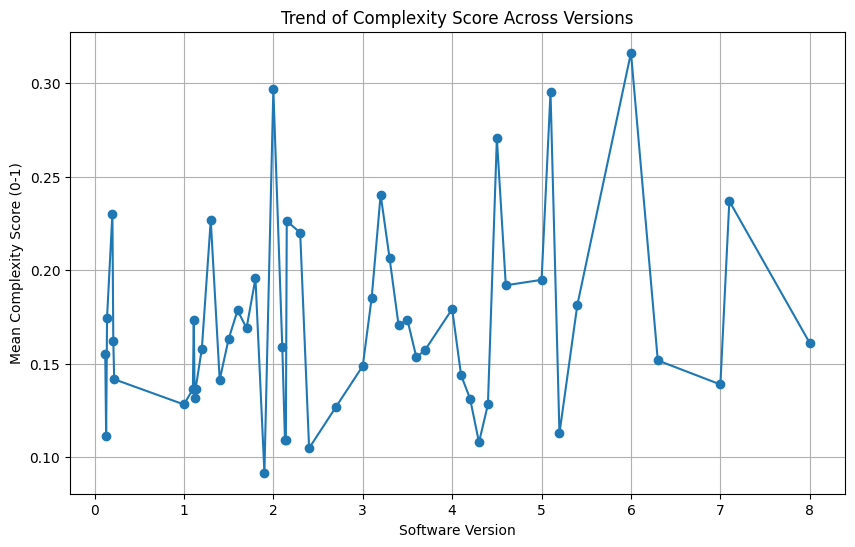

In [ ]:
version_summary = df.groupby("version")["complexity_score"].mean().reset_index()
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(version_summary["version"], version_summary["complexity_score"], marker='o')
plt.xlabel("Software Version")
plt.ylabel("Mean Complexity Score (0-1)")
plt.title("Trend of Complexity Score Across Versions")
plt.grid(True)
plt.show()



/tmp/ipython-input-3539784822.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="version", y="complexity_score", data=df, ci=None, estimator='mean', color='red')


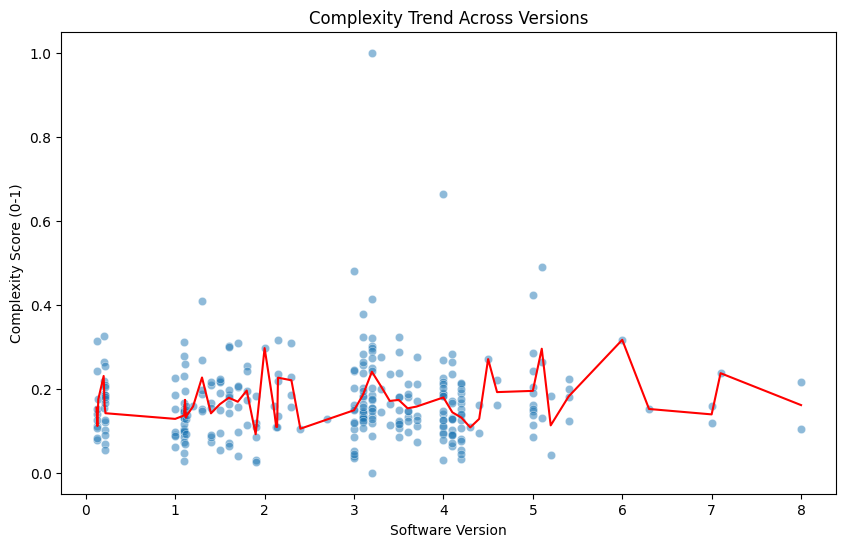

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(x="version", y="complexity_score", data=df, alpha=0.5)
sns.lineplot(x="version", y="complexity_score", data=df, ci=None, estimator='mean', color='red')
plt.xlabel("Software Version")
plt.ylabel("Complexity Score (0-1)")
plt.title("Complexity Trend Across Versions")
plt.show()


Could not establish any trends between version and complexity

### complexity over repo

In [ ]:
repo_summary = df.groupby("repo")["complexity_score"].mean().sort_values(ascending=False)
print(repo_summary)


repo
pallets/flask                0.278200
sphinx-doc/sphinx            0.210759
scikit-learn/scikit-learn    0.188683
pylint-dev/pylint            0.187254
django/django                0.177063
pydata/xarray                0.173977
pytest-dev/pytest            0.169734
matplotlib/matplotlib        0.164635
astropy/astropy              0.164053
psf/requests                 0.151297
sympy/sympy                  0.147835
mwaskom/seaborn              0.120297
Name: complexity_score, dtype: float64


the average complexity is not that different...

/tmp/ipython-input-2174184867.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="repo", y="complexity_score", data=df, palette=palette)


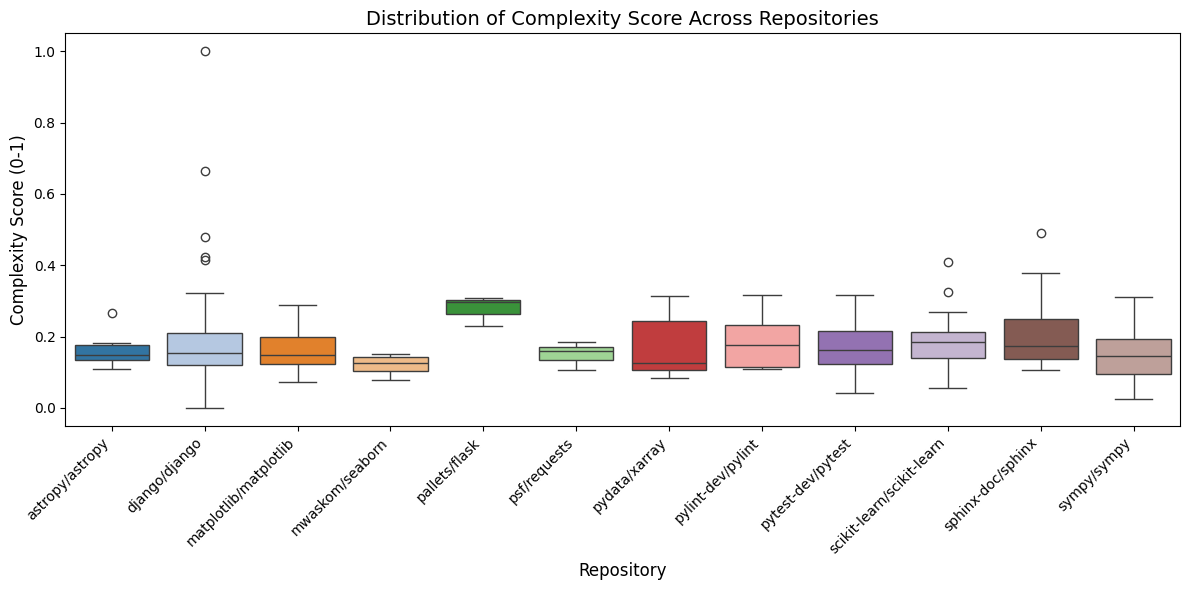

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))

# Choose a vibrant palette (e.g., tab20, Set3)
palette = sns.color_palette("tab20", n_colors=df["repo"].nunique())

# Boxplot with better colors
sns.boxplot(x="repo", y="complexity_score", data=df, palette=palette)

# Formatting
plt.xticks(rotation=45, ha='right')
plt.xlabel("Repository", fontsize=12)
plt.ylabel("Complexity Score (0-1)", fontsize=12)
plt.title("Distribution of Complexity Score Across Repositories", fontsize=14)
plt.tight_layout()  # Avoid clipping of labels
plt.savefig(os.path.join(Save_path, "complexity_repo_boxplot.pdf"))
plt.show()


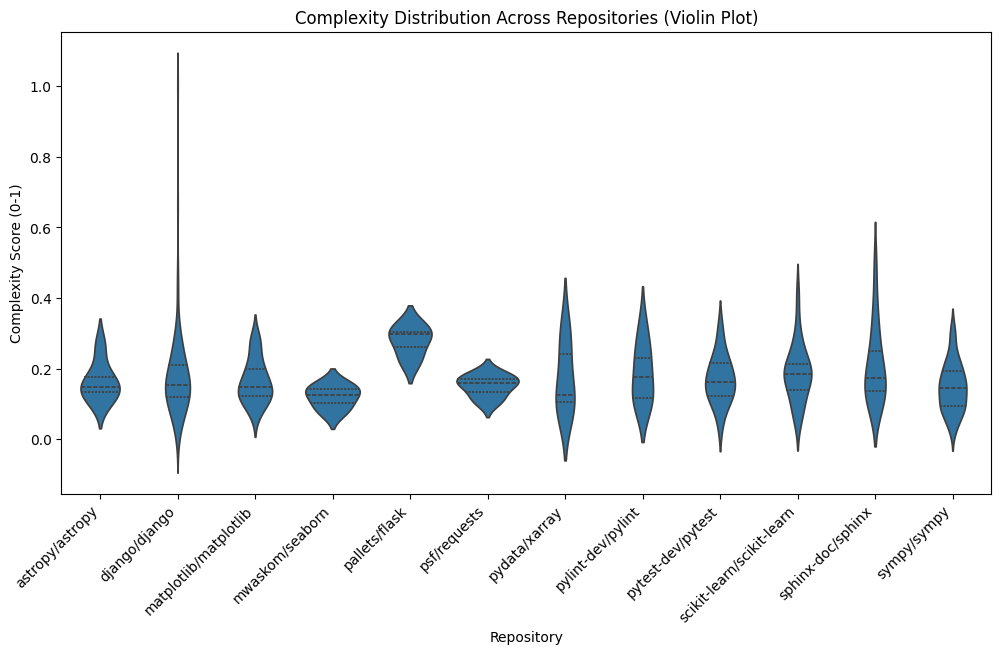

In [ ]:
plt.figure(figsize=(12,6))
sns.violinplot(x="repo", y="complexity_score", data=df, inner="quartile")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Repository")
plt.ylabel("Complexity Score (0-1)")
plt.title("Complexity Distribution Across Repositories (Violin Plot)")
plt.show()


## clustering

In [ ]:
from sentence_transformers import SentenceTransformer
import umap
import hdbscan
import numpy as np

extra_features = ["num_PASS_TO_PASS", "has_hint", "hint_length"]
df["has_hint"] = df["has_hint"].astype(int)
scaler_extra = StandardScaler()
X_extra = scaler_extra.fit_transform(df[extra_features])

### Text embeddings
embedder = SentenceTransformer("all-MiniLM-L6-v2")
X_text = embedder.encode(df["clean_text"].tolist(), batch_size=64, show_progress_bar=True)

####Combine features
TEXT_WEIGHT = 1.0
COMPLEXITY_WEIGHT = 0.5
EXTRA_WEIGHT = 0.5

X_combined = np.hstack([
    TEXT_WEIGHT * X_text,
    COMPLEXITY_WEIGHT * df[["complexity_score"]].values,
    EXTRA_WEIGHT * X_extra
])


Batches:   0%|          | 0/5 [00:00<?, ?it/s]

### reduce dimension

In [ ]:
import umap
import hdbscan
import numpy as np

# Dimensions to try
dims_to_test = [5, 10, 15, 20, 25]
results = []
for n_dim in dims_to_test:
    # Reduce embeddings to n_dim dimensions
    umap_model = umap.UMAP(n_neighbors=15, n_components=n_dim, metric='cosine', random_state=42)
    reduced = umap_model.fit_transform(X_combined)

    # Cluster with HDBSCAN
    clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=5, metric='euclidean', cluster_selection_method='eom')
    labels = clusterer.fit_predict(reduced)

    # Compute metrics
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    noise_fraction = np.sum(labels == -1) / len(labels)

    results.append((n_dim, n_clusters, noise_fraction))

# Convert to DataFrame for easy inspection
import pandas as pd
results_df = pd.DataFrame(results, columns=['n_dimensions', 'n_clusters', 'noise_fraction'])
print(results_df)


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


   n_dimensions  n_clusters  noise_fraction
0             5           2             0.0
1            10           2             0.0
2            15           2             0.0
3            20           2             0.0
4            25           2             0.0


In [ ]:
print("Original embedding shape:", X_combined.shape)

Original embedding shape: (300, 388)


print("Original embedding shape:", X_combined.shape)

In [ ]:
# --------------------------
# 5. Dimensionality reduction
# --------------------------
reducer = umap.UMAP(
    n_neighbors=15,
    n_components=10,
    metric="cosine",
    random_state=42
)
X_umap = reducer.fit_transform(X_combined)

# --------------------------
# 6. HDBSCAN clustering
# --------------------------
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=5,
    min_samples=3,
    metric="euclidean",
    cluster_selection_method="eom"
)
df["hdbscan_topic_full_cs"] = clusterer.fit_predict(X_umap)

# --------------------------
# 7. Cluster summary
# --------------------------
print(df["hdbscan_topic_full_cs"].value_counts())

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


hdbscan_topic_full_cs
1    224
0     76
Name: count, dtype: int64
